In [163]:

import numpy as np
import pandas as pd 



#all required libraries imported 

Import required libraries (not allowed: scikit-learn or any other libraries with inbuilt functions that help to implement ML methods).


In [164]:
data=pd.read_csv("C:/Users/viraj/Code_a/ML_Prof_Alina/Assignment_1/datasets (1)/datasets/penguins.csv")#reading the File
#pd.set_option('display.max_rows', None)

Read, preprocess, and print the main statistics about the dataset (you can reuse
your code from Assignment 0 with a proper citation)


In [165]:
data.head()  #showcasing the first 5  rows of the dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [166]:
data.isnull().sum() #checking th enull values

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [167]:
data=data.dropna()  #deleting the rows having NAN values

In [168]:
data.info() #showcasing the Datatype of elements of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [169]:
data.describe()  #The main statistics of the dataSet

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [170]:
d1=data.species.describe()   
d2=data.island.describe() 
d3=data.sex.describe() 
print(d1,d2,d3)

count        333
unique         3
top       Adelie
freq         146
Name: species, dtype: object count        333
unique         3
top       Biscoe
freq         163
Name: island, dtype: object count      333
unique       2
top       male
freq       168
Name: sex, dtype: object


In [171]:
for col in data.columns:
    print(col)  #printing the column names

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
year


## Convert features with string datatype to categorical (species, island, sex).

Example: suppose you have a dataset that contains information about movies,
with the following features: title (string), director (string), genre (string). You need
to convert these features of string datatype to categorical features. This can be
done by assigning a unique numerical value to each unique string value in each
categorical feature.

In [172]:
#Here Species,islands and sex has datatype as sting 

data[['species','island','sex']] = data[['species','island','sex']].astype('category')

In [173]:
data['sex'] = pd.factorize(data['sex'])[0]
data['island'] = pd.factorize(data['island'])[0]
data['species'] = pd.factorize(data['species'])[0]

#converting Categorical value into numerical value

In [174]:
data.info() #here we could see the datatype has been changed of the following 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   year               333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


In [175]:
print(data.dtypes)

species                int64
island                 int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
year                   int64
dtype: object


In [176]:
data.shape

(333, 8)

## 4. Normalize non-categorical features (bill_length_mm, bill_depth_mm,flipper_length_mm, body_mass_g).

a. Find the min and max values for each column.

b. Rescale dataset columns to the range from 0 to 1



Why do we do this? Normalization is to transform features to be on a similar
scale. This improves the performance and training stability of the model.

###### Note: normalize() is not allowed as it is a part of scikit-learn library.

In [177]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.1,18.7,181.0,3750.0,0,2007
1,0,0,39.5,17.4,186.0,3800.0,1,2007
2,0,0,40.3,18.0,195.0,3250.0,1,2007
4,0,0,36.7,19.3,193.0,3450.0,1,2007
5,0,0,39.3,20.6,190.0,3650.0,0,2007


In [178]:
#a. Find the min and max values for each column.

bill_length_mm_min , bill_length_mm_max = min(data['bill_length_mm']),max(data['bill_length_mm'])

bill_depth_mm_min ,  bill_depth_mm_max = min(data['bill_depth_mm']) ,max(data['bill_depth_mm'])

flipper_length__mm_min ,flipper_length_mm_max = min(data['flipper_length_mm']) , max(data['flipper_length_mm'])
 
body_mass_g_min , body_mass_g_max = min(data['body_mass_g']) , max(data['body_mass_g'])
 


In [179]:
data1=data

In [180]:
#b. Rescale dataset columns to the range from 0 to 1

data1['bill_length_mm'] = (data1['bill_length_mm'] - bill_length_mm_min) / (bill_length_mm_max - bill_length_mm_min)
data1['bill_depth_mm']  = (data1['bill_depth_mm']  - bill_depth_mm_min)  / (bill_depth_mm_max  - bill_depth_mm_min)
data1['flipper_length_mm'] = (data1['flipper_length_mm'] - flipper_length__mm_min)/(flipper_length_mm_max - flipper_length__mm_min)
data1['body_mass_g'] = (data1['body_mass_g'] - body_mass_g_min)/(body_mass_g_max - body_mass_g_min)


In [181]:
data1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,0.254545,0.666667,0.152542,0.291667,0,2007
1,0,0,0.269091,0.511905,0.237288,0.305556,1,2007
2,0,0,0.298182,0.583333,0.389831,0.152778,1,2007
4,0,0,0.167273,0.738095,0.355932,0.208333,1,2007
5,0,0,0.261818,0.892857,0.305085,0.263889,0,2007
...,...,...,...,...,...,...,...,...
339,2,2,0.861818,0.797619,0.593220,0.361111,0,2009
340,2,2,0.414545,0.595238,0.508475,0.194444,1,2009
341,2,2,0.636364,0.607143,0.355932,0.298611,0,2009
342,2,2,0.680000,0.702381,0.644068,0.388889,0,2009


## 5. Choose your target Y. For this dataset, there are several options:
a. We can use a binary classifier to predict which gender a penguin belongs to (female or male). In this case, column sex can be used as Y (target)


b. We can use a binary classifier to predict if a penguin’s location is Torgersen island or not. In this case, column island can be used as Y (target) 



In [182]:
#**Step 5 - Choosing target**

#Here we have chosen species as the target, rest all are the inputs.

## Create the data matrices for X (input) and Y (target) in a shape,X = 𝑁 x 𝑑 and Y = 𝑁 x 1, were 𝑁 is a number of data samples and 𝑑 has a number of features. 


In [183]:
data1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,0.254545,0.666667,0.152542,0.291667,0,2007
1,0,0,0.269091,0.511905,0.237288,0.305556,1,2007
2,0,0,0.298182,0.583333,0.389831,0.152778,1,2007
4,0,0,0.167273,0.738095,0.355932,0.208333,1,2007
5,0,0,0.261818,0.892857,0.305085,0.263889,0,2007
...,...,...,...,...,...,...,...,...
339,2,2,0.861818,0.797619,0.593220,0.361111,0,2009
340,2,2,0.414545,0.595238,0.508475,0.194444,1,2009
341,2,2,0.636364,0.607143,0.355932,0.298611,0,2009
342,2,2,0.680000,0.702381,0.644068,0.388889,0,2009


In [184]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,0.254545,0.666667,0.152542,0.291667,0,2007
1,0,0,0.269091,0.511905,0.237288,0.305556,1,2007
2,0,0,0.298182,0.583333,0.389831,0.152778,1,2007
4,0,0,0.167273,0.738095,0.355932,0.208333,1,2007
5,0,0,0.261818,0.892857,0.305085,0.263889,0,2007
...,...,...,...,...,...,...,...,...
339,2,2,0.861818,0.797619,0.593220,0.361111,0,2009
340,2,2,0.414545,0.595238,0.508475,0.194444,1,2009
341,2,2,0.636364,0.607143,0.355932,0.298611,0,2009
342,2,2,0.680000,0.702381,0.644068,0.388889,0,2009


In [185]:
data1['sex'] = pd.factorize(data1['sex'])[0]
data1['island'] = pd.factorize(data1['island'])[0]
data1['species'] = pd.factorize(data1['species'])[0]

In [186]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   year               333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


In [187]:
import random
data1 = data1.sample(frac = 1)

In [188]:
data2_except_sex_X=data1[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','species']]
data2_except_sex_X.shape

(333, 5)

In [189]:
data3_sex_column_Y=data1['sex']
print(data3_sex_column_Y.shape)
data3_sex_column_Y=data3_sex_column_Y.astype(int)
#print(data3_sex_column_Y.dtype)

(333,)


## Divide the dataset into training and test, as 80% training, 20% testing dataset.


In [190]:
import random
random.seed(46)

train_size = int(len(data2_except_sex_X) * 0.8)

X_train = data2_except_sex_X[0:train_size]
Y_train = data3_sex_column_Y[0:train_size]

X_test = data2_except_sex_X[train_size : ]
Y_test = data3_sex_column_Y[train_size : ]

#test = df[train_size:]

In [191]:
Y_test.info

<bound method Series.info of 104    1
125    0
249    1
322    1
328    1
      ..
204    1
174    1
62     1
149    0
156    0
Name: sex, Length: 67, dtype: int32>

## Print the shape of your X_train, y_train, X_test, y_test


In [192]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(266, 5)
(266,)
(67, 5)
(67,)


## The Recommended structure of the code for defining logistic regression:


In [193]:
import math
class LogitRegression():
    
    def __init__(self, learning_rate = 0.001, iterations = 10000):
        # Takes as an input hyperparameters: learning rate and the number of iterations.
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.losses = []
    
    def sigmoid(self, x):
        # Defining the sigmoid function.
        x = np.float64(x)
        sigma = 1/(1 + np.exp(-x))
        return sigma
    
    def cost(self, y, y_pred):
        # Defining the loss function.
        N = len(y)
       # cost = -(1/N) * [y*math.log(y_pred) + (1-y)*math.log(1-y_pred)]
        cost = -(1/N) * (y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
        return cost
        
    def gradient(self, n, X, y, y_pred):
        # Defining gradient function.
        dw = (1 / n) * np.dot(X.T, (y_pred - y))
        db = (1 / n) * np.sum(y_pred - y)
        return dw, db
    
    def fit(self, X, y):
        n, no_feature  = X.shape
        self.weights = np.random.uniform(0, 1, 5)
        self.bias = 0
        for i in range(self.iterations):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw, db = self.gradient(n, X, y, y_pred)
            loss = self.cost(y, y_pred)
            
            print(f"Iteration {i}: loss = {np.mean(loss)}")
            self.losses.append(loss)
            # update weights and bias
            self.weights -= self.learning_rate*dw
            self.bias -= self.learning_rate*db
    
    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_sex = [1 if i >= 0.5 else 0 for i in y_pred]
        return y_sex

In [ ]:
import math
class LogitRegression():
    
    def _init_(self, learning_rate = 0.001, iterations = 100000):
        # Takes as an input hyperparameters: learning rate and the number of iterations.
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, x):
        # Defining the sigmoid function.
        x = np.float64(x)
        sigma = 1/(1 + np.exp(-x))
        return sigma
    
    def cost(self, y, y_pred):
        # Defining the loss function.
        N = len(y)
        cost = -(1/N) * [y*math.log(y_pred) + (1-y)*math.log(1-y_pred)]
        return cost
        
    def gradient(self, n, X, y, y_pred):
        # Defining gradient function.
        dw = (1 / n) * np.dot(X.T, (y_pred - y))
        db = (1 / n) * np.sum(y_pred - y)
        return dw, db
    
    def fit(self, X, y):
        n, no_feature  = X.shape
        self.weights = np.random.uniform(0, 1, 6)
        self.bias = 0
        for i in range(self.iterations):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw, db = self.gradient(n, X, y, y_pred)
            #loss = self.cost(y, y_pred)
            
            # update weights and bias
            self.weights -= self.learning_rate*dw
            self.bias -= self.learning_rate*db
    
    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_sex = [1 if i >= 0.5 else 0 for i in y_pred]
        return y_sex

## Train the model:
a. Define a model by calling LogitRegression class and passing
hyperparameters, e.g.
model = LogitRegression(learning_rate, iterations)
b. Train the model, by calling fit function and passing your training dataset,
e.g
model.fit(X_train, y_train)
c. Suggested hyperparameters:
Note: You can try different learning rates and number of iterations to
improve your accuracy (accuracy of greater than 64% is expected)
learning_rate=1e-3
iterations=100000
weights = np.random.uniform(0, 1)


In [194]:
import warnings
warnings.filterwarnings('ignore')

model = LogitRegression(0.001, 10000)
model.fit(X_train, Y_train)

Iteration 0: loss = 0.004475576013704986
Iteration 1: loss = 0.004474185976158565
Iteration 2: loss = 0.004472796622099636
Iteration 3: loss = 0.004471407951664224
Iteration 4: loss = 0.004470019964987998
Iteration 5: loss = 0.0044686326622062665
Iteration 6: loss = 0.004467246043453989
Iteration 7: loss = 0.00446586010886576
Iteration 8: loss = 0.004464474858575824
Iteration 9: loss = 0.00446309029271806
Iteration 10: loss = 0.004461706411425994
Iteration 11: loss = 0.004460323214832792
Iteration 12: loss = 0.004458940703071257
Iteration 13: loss = 0.004457558876273839
Iteration 14: loss = 0.00445617773457262
Iteration 15: loss = 0.004454797278099329
Iteration 16: loss = 0.004453417506985325
Iteration 17: loss = 0.004452038421361613
Iteration 18: loss = 0.004450660021358836
Iteration 19: loss = 0.004449282307107266
Iteration 20: loss = 0.004447905278736824
Iteration 21: loss = 0.004446528936377057
Iteration 22: loss = 0.004445153280157154
Iteration 23: loss = 0.00444377831020594
Itera

Iteration 196: loss = 0.004216335995958851
Iteration 197: loss = 0.004215082056279901
Iteration 198: loss = 0.004213828819431298
Iteration 199: loss = 0.0042125762854715275
Iteration 200: loss = 0.004211324454458651
Iteration 201: loss = 0.004210073326450295
Iteration 202: loss = 0.004208822901503653
Iteration 203: loss = 0.004207573179675491
Iteration 204: loss = 0.004206324161022138
Iteration 205: loss = 0.004205075845599494
Iteration 206: loss = 0.0042038282334630256
Iteration 207: loss = 0.004202581324667766
Iteration 208: loss = 0.004201335119268315
Iteration 209: loss = 0.00420008961731884
Iteration 210: loss = 0.004198844818873071
Iteration 211: loss = 0.004197600723984308
Iteration 212: loss = 0.004196357332705415
Iteration 213: loss = 0.00419511464508882
Iteration 214: loss = 0.004193872661186516
Iteration 215: loss = 0.004192631381050064
Iteration 216: loss = 0.004191390804730586
Iteration 217: loss = 0.004190150932278767
Iteration 218: loss = 0.004188911763744862
Iteration 2

Iteration 396: loss = 0.003979582651583204
Iteration 397: loss = 0.0039784698591243265
Iteration 398: loss = 0.003977357772291884
Iteration 399: loss = 0.00397624639105362
Iteration 400: loss = 0.003975135715376809
Iteration 401: loss = 0.0039740257452282575
Iteration 402: loss = 0.0039729164805743
Iteration 403: loss = 0.003971807921380806
Iteration 404: loss = 0.0039707000676131735
Iteration 405: loss = 0.003969592919236333
Iteration 406: loss = 0.003968486476214742
Iteration 407: loss = 0.003967380738512396
Iteration 408: loss = 0.003966275706092813
Iteration 409: loss = 0.003965171378919045
Iteration 410: loss = 0.003964067756953678
Iteration 411: loss = 0.003962964840158823
Iteration 412: loss = 0.003961862628496126
Iteration 413: loss = 0.003960761121926758
Iteration 414: loss = 0.003959660320411427
Iteration 415: loss = 0.003958560223910366
Iteration 416: loss = 0.003957460832383341
Iteration 417: loss = 0.0039563621457896474
Iteration 418: loss = 0.003955264164088111
Iteration 

Iteration 605: loss = 0.0037622618722282977
Iteration 606: loss = 0.0037612951506521162
Iteration 607: loss = 0.003760329117776877
Iteration 608: loss = 0.003759363773472957
Iteration 609: loss = 0.0037583991176102795
Iteration 610: loss = 0.003757435150058314
Iteration 611: loss = 0.0037564718706860787
Iteration 612: loss = 0.0037555092793621395
Iteration 613: loss = 0.0037545473759546103
Iteration 614: loss = 0.0037535861603311548
Iteration 615: loss = 0.0037526256323589815
Iteration 616: loss = 0.003751665791904851
Iteration 617: loss = 0.003750706638835072
Iteration 618: loss = 0.003749748173015501
Iteration 619: loss = 0.003748790394311546
Iteration 620: loss = 0.0037478333025881636
Iteration 621: loss = 0.003746876897709861
Iteration 622: loss = 0.0037459211795406932
Iteration 623: loss = 0.0037449661479442686
Iteration 624: loss = 0.003744011802783745
Iteration 625: loss = 0.0037430581439218294
Iteration 626: loss = 0.003742105171220784
Iteration 627: loss = 0.003741152884542418

Iteration 801: loss = 0.003585758930921208
Iteration 802: loss = 0.0035849241741451837
Iteration 803: loss = 0.0035840900723599395
Iteration 804: loss = 0.0035832566253528957
Iteration 805: loss = 0.003582423832911088
Iteration 806: loss = 0.0035815916948211657
Iteration 807: loss = 0.0035807602108693945
Iteration 808: loss = 0.003579929380841656
Iteration 809: loss = 0.003579099204523446
Iteration 810: loss = 0.0035782696816998804
Iteration 811: loss = 0.0035774408121556902
Iteration 812: loss = 0.003576612595675224
Iteration 813: loss = 0.003575785032042448
Iteration 814: loss = 0.003574958121040949
Iteration 815: loss = 0.0035741318624539324
Iteration 816: loss = 0.003573306256064221
Iteration 817: loss = 0.00357248130165426
Iteration 818: loss = 0.003571656999006114
Iteration 819: loss = 0.0035708333479014696
Iteration 820: loss = 0.0035700103481216324
Iteration 821: loss = 0.0035691879994475323
Iteration 822: loss = 0.0035683663016597197
Iteration 823: loss = 0.0035675452545383696

Iteration 1012: loss = 0.0034237791431705787
Iteration 1013: loss = 0.003423077324397276
Iteration 1014: loss = 0.0034223761079963037
Iteration 1015: loss = 0.0034216754936852076
Iteration 1016: loss = 0.003420975481181259
Iteration 1017: loss = 0.0034202760702014604
Iteration 1018: loss = 0.0034195772604625452
Iteration 1019: loss = 0.0034188790516809773
Iteration 1020: loss = 0.003418181443572953
Iteration 1021: loss = 0.003417484435854399
Iteration 1022: loss = 0.003416788028240978
Iteration 1023: loss = 0.003416092220448083
Iteration 1024: loss = 0.0034153970121908422
Iteration 1025: loss = 0.0034147024031841197
Iteration 1026: loss = 0.0034140083931425143
Iteration 1027: loss = 0.0034133149817803577
Iteration 1028: loss = 0.0034126221688117243
Iteration 1029: loss = 0.0034119299539504206
Iteration 1030: loss = 0.0034112383369099926
Iteration 1031: loss = 0.003410547317403725
Iteration 1032: loss = 0.003409856895144641
Iteration 1033: loss = 0.0034091670698455034
Iteration 1034: lo

Iteration 1204: loss = 0.003299733449927831
Iteration 1205: loss = 0.003299141827234285
Iteration 1206: loss = 0.003298550748442148
Iteration 1207: loss = 0.003297960213228491
Iteration 1208: loss = 0.003297370221270234
Iteration 1209: loss = 0.0032967807722441506
Iteration 1210: loss = 0.003296191865826864
Iteration 1211: loss = 0.003295603501694853
Iteration 1212: loss = 0.0032950156795244477
Iteration 1213: loss = 0.003294428398991831
Iteration 1214: loss = 0.003293841659773043
Iteration 1215: loss = 0.003293255461543976
Iteration 1216: loss = 0.0032926698039803803
Iteration 1217: loss = 0.0032920846867578613
Iteration 1218: loss = 0.003291500109551882
Iteration 1219: loss = 0.0032909160720377634
Iteration 1220: loss = 0.0032903325738906832
Iteration 1221: loss = 0.0032897496147856805
Iteration 1222: loss = 0.0032891671943976516
Iteration 1223: loss = 0.003288585312401354
Iteration 1224: loss = 0.003288003968471406
Iteration 1225: loss = 0.003287423162282288
Iteration 1226: loss = 0

Iteration 1418: loss = 0.003184991707837456
Iteration 1419: loss = 0.003184508932874843
Iteration 1420: loss = 0.0031840266303068917
Iteration 1421: loss = 0.0031835447997927767
Iteration 1422: loss = 0.0031830634409916523
Iteration 1423: loss = 0.003182582553562653
Iteration 1424: loss = 0.0031821021371648927
Iteration 1425: loss = 0.003181622191457469
Iteration 1426: loss = 0.0031811427160994593
Iteration 1427: loss = 0.0031806637107499253
Iteration 1428: loss = 0.00318018517506791
Iteration 1429: loss = 0.0031797071087124405
Iteration 1430: loss = 0.0031792295113425286
Iteration 1431: loss = 0.00317875238261717
Iteration 1432: loss = 0.0031782757221953464
Iteration 1433: loss = 0.0031777995297360244
Iteration 1434: loss = 0.0031773238048981574
Iteration 1435: loss = 0.003176848547340685
Iteration 1436: loss = 0.0031763737567225337
Iteration 1437: loss = 0.0031758994327026214
Iteration 1438: loss = 0.00317542557493985
Iteration 1439: loss = 0.0031749521830931123
Iteration 1440: loss 

Iteration 1609: loss = 0.0031009636612044566
Iteration 1610: loss = 0.00310056493453203
Iteration 1611: loss = 0.0031001666153850525
Iteration 1612: loss = 0.0030997687034280954
Iteration 1613: loss = 0.0030993711983258016
Iteration 1614: loss = 0.00309897409974289
Iteration 1615: loss = 0.0030985774073441514
Iteration 1616: loss = 0.003098181120794451
Iteration 1617: loss = 0.003097785239758729
Iteration 1618: loss = 0.003097389763902001
Iteration 1619: loss = 0.003096994692889358
Iteration 1620: loss = 0.0030966000263859656
Iteration 1621: loss = 0.003096205764057068
Iteration 1622: loss = 0.0030958119055679843
Iteration 1623: loss = 0.003095418450584112
Iteration 1624: loss = 0.003095025398770924
Iteration 1625: loss = 0.0030946327497939742
Iteration 1626: loss = 0.003094240503318893
Iteration 1627: loss = 0.0030938486590113895
Iteration 1628: loss = 0.003093457216537252
Iteration 1629: loss = 0.00309306617556235
Iteration 1630: loss = 0.003092675535752631
Iteration 1631: loss = 0.0

Iteration 1809: loss = 0.0030288932467514894
Iteration 1810: loss = 0.0030285694710254275
Iteration 1811: loss = 0.0030282460376891917
Iteration 1812: loss = 0.003027922946429225
Iteration 1813: loss = 0.0030276001969321135
Iteration 1814: loss = 0.0030272777888845828
Iteration 1815: loss = 0.0030269557219735014
Iteration 1816: loss = 0.003026633995885877
Iteration 1817: loss = 0.003026312610308862
Iteration 1818: loss = 0.0030259915649297484
Iteration 1819: loss = 0.0030256708594359723
Iteration 1820: loss = 0.003025350493515112
Iteration 1821: loss = 0.0030250304668548874
Iteration 1822: loss = 0.003024710779143163
Iteration 1823: loss = 0.0030243914300679465
Iteration 1824: loss = 0.0030240724193173873
Iteration 1825: loss = 0.0030237537465797825
Iteration 1826: loss = 0.0030234354115435693
Iteration 1827: loss = 0.003023117413897332
Iteration 1828: loss = 0.0030227997533297975
Iteration 1829: loss = 0.00302248242952984
Iteration 1830: loss = 0.003022165442186477
Iteration 1831: los

Iteration 2004: loss = 0.00297186047922714
Iteration 2005: loss = 0.0029715977234436035
Iteration 2006: loss = 0.002971335251842234
Iteration 2007: loss = 0.0029710730641409433
Iteration 2008: loss = 0.0029708111600578206
Iteration 2009: loss = 0.0029705495393111347
Iteration 2010: loss = 0.0029702882016193304
Iteration 2011: loss = 0.0029700271467010303
Iteration 2012: loss = 0.0029697663742750367
Iteration 2013: loss = 0.0029695058840603283
Iteration 2014: loss = 0.0029692456757760646
Iteration 2015: loss = 0.0029689857491415803
Iteration 2016: loss = 0.002968726103876392
Iteration 2017: loss = 0.0029684667397001925
Iteration 2018: loss = 0.002968207656332855
Iteration 2019: loss = 0.0029679488534944307
Iteration 2020: loss = 0.0029676903309051508
Iteration 2021: loss = 0.0029674320882854236
Iteration 2022: loss = 0.00296717412535584
Iteration 2023: loss = 0.002966916441837167
Iteration 2024: loss = 0.002966659037450353
Iteration 2025: loss = 0.0029664019119165267
Iteration 2026: los

Iteration 2207: loss = 0.0029239726163355203
Iteration 2208: loss = 0.0029237620166085187
Iteration 2209: loss = 0.0029235516475680148
Iteration 2210: loss = 0.0029233415089696675
Iteration 2211: loss = 0.0029231316005693254
Iteration 2212: loss = 0.0029229219221230313
Iteration 2213: loss = 0.0029227124733870145
Iteration 2214: loss = 0.0029225032541176964
Iteration 2215: loss = 0.0029222942640716896
Iteration 2216: loss = 0.0029220855030057972
Iteration 2217: loss = 0.002921876970677012
Iteration 2218: loss = 0.0029216686668425197
Iteration 2219: loss = 0.0029214605912596943
Iteration 2220: loss = 0.002921252743686101
Iteration 2221: loss = 0.0029210451238794967
Iteration 2222: loss = 0.0029208377315978282
Iteration 2223: loss = 0.002920630566599233
Iteration 2224: loss = 0.0029204236286420404
Iteration 2225: loss = 0.002920216917484769
Iteration 2226: loss = 0.0029200104328861286
Iteration 2227: loss = 0.0029198041746050203
Iteration 2228: loss = 0.002919598142400535
Iteration 2229:

Iteration 2419: loss = 0.002884118047156142
Iteration 2420: loss = 0.002883951186024947
Iteration 2421: loss = 0.0028837845080285363
Iteration 2422: loss = 0.0028836180129626254
Iteration 2423: loss = 0.0028834517006231146
Iteration 2424: loss = 0.0028832855708060857
Iteration 2425: loss = 0.0028831196233078077
Iteration 2426: loss = 0.0028829538579247336
Iteration 2427: loss = 0.0028827882744534997
Iteration 2428: loss = 0.0028826228726909274
Iteration 2429: loss = 0.002882457652434023
Iteration 2430: loss = 0.0028822926134799767
Iteration 2431: loss = 0.0028821277556261614
Iteration 2432: loss = 0.0028819630786701355
Iteration 2433: loss = 0.0028817985824096414
Iteration 2434: loss = 0.002881634266642605
Iteration 2435: loss = 0.0028814701311671354
Iteration 2436: loss = 0.002881306175781528
Iteration 2437: loss = 0.0028811424002842586
Iteration 2438: loss = 0.0028809788044739893
Iteration 2439: loss = 0.002880815388149565
Iteration 2440: loss = 0.0028806521511100134
Iteration 2441: 

Iteration 2618: loss = 0.0028542678691372246
Iteration 2619: loss = 0.002854133661568811
Iteration 2620: loss = 0.0028539996000254363
Iteration 2621: loss = 0.0028538656843380547
Iteration 2622: loss = 0.0028537319143377864
Iteration 2623: loss = 0.002853598289855921
Iteration 2624: loss = 0.0028534648107239164
Iteration 2625: loss = 0.0028533314767733966
Iteration 2626: loss = 0.002853198287836156
Iteration 2627: loss = 0.002853065243744154
Iteration 2628: loss = 0.00285293234432952
Iteration 2629: loss = 0.0028527995894245496
Iteration 2630: loss = 0.0028526669788617063
Iteration 2631: loss = 0.0028525345124736203
Iteration 2632: loss = 0.0028524021900930897
Iteration 2633: loss = 0.00285227001155308
Iteration 2634: loss = 0.0028521379766867226
Iteration 2635: loss = 0.002852006085327316
Iteration 2636: loss = 0.002851874337308327
Iteration 2637: loss = 0.0028517427324633864
Iteration 2638: loss = 0.0028516112706262944
Iteration 2639: loss = 0.0028514799516310167
Iteration 2640: loss

Iteration 2818: loss = 0.0028301208486877986
Iteration 2819: loss = 0.0028300126963630703
Iteration 2820: loss = 0.002829904659465084
Iteration 2821: loss = 0.002829796737856343
Iteration 2822: loss = 0.002829688931399498
Iteration 2823: loss = 0.0028295812399573464
Iteration 2824: loss = 0.002829473663392832
Iteration 2825: loss = 0.0028293662015690447
Iteration 2826: loss = 0.00282925885434922
Iteration 2827: loss = 0.0028291516215967413
Iteration 2828: loss = 0.002829044503175137
Iteration 2829: loss = 0.0028289374989480818
Iteration 2830: loss = 0.0028288306087793946
Iteration 2831: loss = 0.0028287238325330425
Iteration 2832: loss = 0.0028286171700731373
Iteration 2833: loss = 0.002828510621263935
Iteration 2834: loss = 0.002828404185969839
Iteration 2835: loss = 0.002828297864055396
Iteration 2836: loss = 0.0028281916553852993
Iteration 2837: loss = 0.0028280855598243866
Iteration 2838: loss = 0.002827979577237642
Iteration 2839: loss = 0.0028278737074901904
Iteration 2840: loss 

Iteration 3017: loss = 0.002810703700191369
Iteration 3018: loss = 0.0028106159915979225
Iteration 3019: loss = 0.002810528373813187
Iteration 3020: loss = 0.0028104408467266276
Iteration 3021: loss = 0.0028103534102278324
Iteration 3022: loss = 0.002810266064206514
Iteration 3023: loss = 0.002810178808552509
Iteration 3024: loss = 0.002810091643155778
Iteration 3025: loss = 0.0028100045679064047
Iteration 3026: loss = 0.002809917582694597
Iteration 3027: loss = 0.0028098306874106862
Iteration 3028: loss = 0.0028097438819451267
Iteration 3029: loss = 0.002809657166188496
Iteration 3030: loss = 0.0028095705400314956
Iteration 3031: loss = 0.0028094840033649495
Iteration 3032: loss = 0.002809397556079803
Iteration 3033: loss = 0.002809311198067127
Iteration 3034: loss = 0.002809224929218115
Iteration 3035: loss = 0.00280913874942408
Iteration 3036: loss = 0.0028090526585764605
Iteration 3037: loss = 0.002808966656566816
Iteration 3038: loss = 0.0028088807432868285
Iteration 3039: loss = 

Iteration 3202: loss = 0.002795914089453873
Iteration 3203: loss = 0.0027958414228220004
Iteration 3204: loss = 0.00279576882854823
Iteration 3205: loss = 0.002795696306543128
Iteration 3206: loss = 0.0027956238567173625
Iteration 3207: loss = 0.0027955514789817074
Iteration 3208: loss = 0.0027954791732470396
Iteration 3209: loss = 0.0027954069394243402
Iteration 3210: loss = 0.0027953347774246945
Iteration 3211: loss = 0.002795262687159289
Iteration 3212: loss = 0.002795190668539417
Iteration 3213: loss = 0.002795118721476473
Iteration 3214: loss = 0.002795046845881955
Iteration 3215: loss = 0.002794975041667466
Iteration 3216: loss = 0.002794903308744709
Iteration 3217: loss = 0.0027948316470254933
Iteration 3218: loss = 0.0027947600564217274
Iteration 3219: loss = 0.0027946885368454262
Iteration 3220: loss = 0.002794617088208705
Iteration 3221: loss = 0.002794545710423783
Iteration 3222: loss = 0.00279447440340298
Iteration 3223: loss = 0.0027944031670587206
Iteration 3224: loss = 0

Iteration 3399: loss = 0.002782889575061338
Iteration 3400: loss = 0.0027828295608281
Iteration 3401: loss = 0.0027827696032178962
Iteration 3402: loss = 0.0027827097021598775
Iteration 3403: loss = 0.0027826498575832816
Iteration 3404: loss = 0.002782590069417428
Iteration 3405: loss = 0.002782530337591722
Iteration 3406: loss = 0.002782470662035654
Iteration 3407: loss = 0.0027824110426787974
Iteration 3408: loss = 0.002782351479450813
Iteration 3409: loss = 0.002782291972281443
Iteration 3410: loss = 0.0027822325211005147
Iteration 3411: loss = 0.002782173125837941
Iteration 3412: loss = 0.002782113786423716
Iteration 3413: loss = 0.002782054502787921
Iteration 3414: loss = 0.0027819952748607195
Iteration 3415: loss = 0.002781936102572358
Iteration 3416: loss = 0.0027818769858531686
Iteration 3417: loss = 0.0027818179246335666
Iteration 3418: loss = 0.002781758918844049
Iteration 3419: loss = 0.002781699968415199
Iteration 3420: loss = 0.0027816410732776804
Iteration 3421: loss = 0.

Iteration 3611: loss = 0.0027713287091585288
Iteration 3612: loss = 0.002771279240110058
Iteration 3613: loss = 0.0027712298144267084
Iteration 3614: loss = 0.002771180432053706
Iteration 3615: loss = 0.0027711310929363405
Iteration 3616: loss = 0.00277108179701997
Iteration 3617: loss = 0.0027710325442500206
Iteration 3618: loss = 0.0027709833345719837
Iteration 3619: loss = 0.0027709341679314193
Iteration 3620: loss = 0.002770885044273953
Iteration 3621: loss = 0.0027708359635452763
Iteration 3622: loss = 0.0027707869256911504
Iteration 3623: loss = 0.0027707379306574
Iteration 3624: loss = 0.0027706889783899176
Iteration 3625: loss = 0.002770640068834662
Iteration 3626: loss = 0.002770591201937658
Iteration 3627: loss = 0.0027705423776449977
Iteration 3628: loss = 0.0027704935959028385
Iteration 3629: loss = 0.0027704448566574025
Iteration 3630: loss = 0.0027703961598549826
Iteration 3631: loss = 0.002770347505441932
Iteration 3632: loss = 0.0027702988933646726
Iteration 3633: loss 

Iteration 3823: loss = 0.0027617306614043558
Iteration 3824: loss = 0.002761689259827641
Iteration 3825: loss = 0.0027616478913925413
Iteration 3826: loss = 0.002761606556056927
Iteration 3827: loss = 0.002761565253778722
Iteration 3828: loss = 0.0027615239845159025
Iteration 3829: loss = 0.0027614827482264964
Iteration 3830: loss = 0.0027614415448685855
Iteration 3831: loss = 0.002761400374400303
Iteration 3832: loss = 0.002761359236779834
Iteration 3833: loss = 0.0027613181319654165
Iteration 3834: loss = 0.0027612770599153404
Iteration 3835: loss = 0.0027612360205879474
Iteration 3836: loss = 0.0027611950139416314
Iteration 3837: loss = 0.0027611540399348376
Iteration 3838: loss = 0.0027611130985260657
Iteration 3839: loss = 0.0027610721896738637
Iteration 3840: loss = 0.002761031313336833
Iteration 3841: loss = 0.0027609904694736276
Iteration 3842: loss = 0.002760949658042951
Iteration 3843: loss = 0.00276090887900356
Iteration 3844: loss = 0.002760868132314263
Iteration 3845: loss

Iteration 4018: loss = 0.0027542358988343306
Iteration 4019: loss = 0.002754200223488495
Iteration 4020: loss = 0.0027541645739916324
Iteration 4021: loss = 0.002754128950310767
Iteration 4022: loss = 0.0027540933524129643
Iteration 4023: loss = 0.0027540577802653335
Iteration 4024: loss = 0.0027540222338350226
Iteration 4025: loss = 0.0027539867130892213
Iteration 4026: loss = 0.0027539512179951633
Iteration 4027: loss = 0.002753915748520121
Iteration 4028: loss = 0.0027538803046314093
Iteration 4029: loss = 0.002753844886296384
Iteration 4030: loss = 0.0027538094934824427
Iteration 4031: loss = 0.0027537741261570237
Iteration 4032: loss = 0.002753738784287606
Iteration 4033: loss = 0.0027537034678417113
Iteration 4034: loss = 0.0027536681767869006
Iteration 4035: loss = 0.002753632911090777
Iteration 4036: loss = 0.002753597670720983
Iteration 4037: loss = 0.002753562455645204
Iteration 4038: loss = 0.0027535272658311648
Iteration 4039: loss = 0.002753492101246632
Iteration 4040: los

Iteration 4221: loss = 0.002747481213242696
Iteration 4222: loss = 0.0027474501630184414
Iteration 4223: loss = 0.002747419132737198
Iteration 4224: loss = 0.00274738812237348
Iteration 4225: loss = 0.0027473571319018377
Iteration 4226: loss = 0.0027473261612968513
Iteration 4227: loss = 0.0027472952105331333
Iteration 4228: loss = 0.0027472642795853303
Iteration 4229: loss = 0.0027472333684281196
Iteration 4230: loss = 0.0027472024770362116
Iteration 4231: loss = 0.002747171605384349
Iteration 4232: loss = 0.002747140753447306
Iteration 4233: loss = 0.002747109921199891
Iteration 4234: loss = 0.00274707910861694
Iteration 4235: loss = 0.0027470483156733262
Iteration 4236: loss = 0.002747017542343952
Iteration 4237: loss = 0.002746986788603752
Iteration 4238: loss = 0.002746956054427694
Iteration 4239: loss = 0.002746925339790777
Iteration 4240: loss = 0.002746894644668031
Iteration 4241: loss = 0.002746863969034519
Iteration 4242: loss = 0.002746833312865335
Iteration 4243: loss = 0.0

Iteration 4427: loss = 0.002741471626063989
Iteration 4428: loss = 0.0027414441898437132
Iteration 4429: loss = 0.002741416768948122
Iteration 4430: loss = 0.0027413893633576394
Iteration 4431: loss = 0.0027413619730527103
Iteration 4432: loss = 0.0027413345980138097
Iteration 4433: loss = 0.002741307238221433
Iteration 4434: loss = 0.0027412798936561045
Iteration 4435: loss = 0.0027412525642983706
Iteration 4436: loss = 0.0027412252501288043
Iteration 4437: loss = 0.002741197951128003
Iteration 4438: loss = 0.0027411706672765893
Iteration 4439: loss = 0.0027411433985552107
Iteration 4440: loss = 0.002741116144944539
Iteration 4441: loss = 0.002741088906425272
Iteration 4442: loss = 0.00274106168297813
Iteration 4443: loss = 0.0027410344745838608
Iteration 4444: loss = 0.0027410072812232345
Iteration 4445: loss = 0.0027409801028770477
Iteration 4446: loss = 0.002740952939526121
Iteration 4447: loss = 0.0027409257911513
Iteration 4448: loss = 0.0027408986577334526
Iteration 4449: loss =

Iteration 4612: loss = 0.002736637560409732
Iteration 4613: loss = 0.0027366126507036956
Iteration 4614: loss = 0.0027365877530971063
Iteration 4615: loss = 0.002736562867574534
Iteration 4616: loss = 0.002736537994120571
Iteration 4617: loss = 0.0027365131327198276
Iteration 4618: loss = 0.0027364882833569356
Iteration 4619: loss = 0.002736463446016546
Iteration 4620: loss = 0.0027364386206833293
Iteration 4621: loss = 0.0027364138073419746
Iteration 4622: loss = 0.002736389005977194
Iteration 4623: loss = 0.0027363642165737167
Iteration 4624: loss = 0.002736339439116292
Iteration 4625: loss = 0.0027363146735896885
Iteration 4626: loss = 0.0027362899199786968
Iteration 4627: loss = 0.002736265178268124
Iteration 4628: loss = 0.002736240448442799
Iteration 4629: loss = 0.002736215730487569
Iteration 4630: loss = 0.0027361910243873014
Iteration 4631: loss = 0.0027361663301268832
Iteration 4632: loss = 0.00273614164769122
Iteration 4633: loss = 0.002736116977065239
Iteration 4634: loss =

Iteration 4812: loss = 0.0027318773597519775
Iteration 4813: loss = 0.0027318545874814716
Iteration 4814: loss = 0.0027318318245894047
Iteration 4815: loss = 0.0027318090710638635
Iteration 4816: loss = 0.002731786326892951
Iteration 4817: loss = 0.0027317635920647847
Iteration 4818: loss = 0.002731740866567497
Iteration 4819: loss = 0.002731718150389238
Iteration 4820: loss = 0.0027316954435181702
Iteration 4821: loss = 0.002731672745942474
Iteration 4822: loss = 0.002731650057650343
Iteration 4823: loss = 0.0027316273786299875
Iteration 4824: loss = 0.002731604708869632
Iteration 4825: loss = 0.002731582048357518
Iteration 4826: loss = 0.0027315593970819
Iteration 4827: loss = 0.002731536755031049
Iteration 4828: loss = 0.0027315141221932516
Iteration 4829: loss = 0.0027314914985568078
Iteration 4830: loss = 0.002731468884110034
Iteration 4831: loss = 0.002731446278841262
Iteration 4832: loss = 0.0027314236827388387
Iteration 4833: loss = 0.002731401095791125
Iteration 4834: loss = 0

Iteration 5006: loss = 0.002727621680581793
Iteration 5007: loss = 0.0027276005221056956
Iteration 5008: loss = 0.002727579370963343
Iteration 5009: loss = 0.00272755822714547
Iteration 5010: loss = 0.0027275370906428274
Iteration 5011: loss = 0.002727515961446177
Iteration 5012: loss = 0.002727494839546292
Iteration 5013: loss = 0.002727473724933958
Iteration 5014: loss = 0.002727452617599973
Iteration 5015: loss = 0.0027274315175351447
Iteration 5016: loss = 0.0027274104247302965
Iteration 5017: loss = 0.00272738933917626
Iteration 5018: loss = 0.0027273682608638817
Iteration 5019: loss = 0.0027273471897840177
Iteration 5020: loss = 0.002727326125927537
Iteration 5021: loss = 0.002727305069285321
Iteration 5022: loss = 0.0027272840198482623
Iteration 5023: loss = 0.0027272629776072645
Iteration 5024: loss = 0.002727241942553244
Iteration 5025: loss = 0.002727220914677129
Iteration 5026: loss = 0.0027271998939698604
Iteration 5027: loss = 0.0027271788804223876
Iteration 5028: loss = 0

Iteration 5196: loss = 0.002723723428837795
Iteration 5197: loss = 0.0027237035102164638
Iteration 5198: loss = 0.002723683597368461
Iteration 5199: loss = 0.002723663690286551
Iteration 5200: loss = 0.0027236437889635087
Iteration 5201: loss = 0.002723623893392117
Iteration 5202: loss = 0.002723604003565169
Iteration 5203: loss = 0.0027235841194754697
Iteration 5204: loss = 0.0027235642411158278
Iteration 5205: loss = 0.002723544368479066
Iteration 5206: loss = 0.002723524501558016
Iteration 5207: loss = 0.002723504640345516
Iteration 5208: loss = 0.002723484784834417
Iteration 5209: loss = 0.002723464935017576
Iteration 5210: loss = 0.002723445090887861
Iteration 5211: loss = 0.0027234252524381505
Iteration 5212: loss = 0.0027234054196613295
Iteration 5213: loss = 0.002723385592550294
Iteration 5214: loss = 0.002723365771097949
Iteration 5215: loss = 0.0027233459552972092
Iteration 5216: loss = 0.002723326145140997
Iteration 5217: loss = 0.0027233063406222452
Iteration 5218: loss = 0

Iteration 5386: loss = 0.002720034882318014
Iteration 5387: loss = 0.0027200159407022194
Iteration 5388: loss = 0.0027199970036411577
Iteration 5389: loss = 0.0027199780711291794
Iteration 5390: loss = 0.002719959143160643
Iteration 5391: loss = 0.002719940219729915
Iteration 5392: loss = 0.002719921300831367
Iteration 5393: loss = 0.00271990238645938
Iteration 5394: loss = 0.0027198834766083424
Iteration 5395: loss = 0.0027198645712726488
Iteration 5396: loss = 0.002719845670446701
Iteration 5397: loss = 0.0027198267741249094
Iteration 5398: loss = 0.00271980788230169
Iteration 5399: loss = 0.0027197889949714684
Iteration 5400: loss = 0.002719770112128675
Iteration 5401: loss = 0.0027197512337677485
Iteration 5402: loss = 0.0027197323598831358
Iteration 5403: loss = 0.0027197134904692884
Iteration 5404: loss = 0.002719694625520668
Iteration 5405: loss = 0.0027196757650317423
Iteration 5406: loss = 0.0027196569089969853
Iteration 5407: loss = 0.0027196380574108794
Iteration 5408: loss 

Iteration 5584: loss = 0.0027163665103883032
Iteration 5585: loss = 0.0027163483692481654
Iteration 5586: loss = 0.002716330231676323
Iteration 5587: loss = 0.0027163120976684122
Iteration 5588: loss = 0.0027162939672200764
Iteration 5589: loss = 0.0027162758403269614
Iteration 5590: loss = 0.002716257716984722
Iteration 5591: loss = 0.002716239597189017
Iteration 5592: loss = 0.0027162214809355115
Iteration 5593: loss = 0.0027162033682198747
Iteration 5594: loss = 0.0027161852590377837
Iteration 5595: loss = 0.00271616715338492
Iteration 5596: loss = 0.002716149051256971
Iteration 5597: loss = 0.002716130952649629
Iteration 5598: loss = 0.002716112857558594
Iteration 5599: loss = 0.002716094765979569
Iteration 5600: loss = 0.0027160766779082634
Iteration 5601: loss = 0.002716058593340394
Iteration 5602: loss = 0.0027160405122716815
Iteration 5603: loss = 0.0027160224346978513
Iteration 5604: loss = 0.002716004360614636
Iteration 5605: loss = 0.0027159862900177738
Iteration 5606: loss 

Iteration 5782: loss = 0.002712838933275204
Iteration 5783: loss = 0.0027128214203653435
Iteration 5784: loss = 0.00271280391026187
Iteration 5785: loss = 0.0027127864029614147
Iteration 5786: loss = 0.0027127688984606114
Iteration 5787: loss = 0.002712751396756099
Iteration 5788: loss = 0.002712733897844521
Iteration 5789: loss = 0.002712716401722524
Iteration 5790: loss = 0.002712698908386761
Iteration 5791: loss = 0.002712681417833887
Iteration 5792: loss = 0.002712663930060563
Iteration 5793: loss = 0.0027126464450634544
Iteration 5794: loss = 0.00271262896283923
Iteration 5795: loss = 0.002712611483384563
Iteration 5796: loss = 0.002712594006696133
Iteration 5797: loss = 0.0027125765327706206
Iteration 5798: loss = 0.0027125590616047133
Iteration 5799: loss = 0.002712541593195102
Iteration 5800: loss = 0.0027125241275384815
Iteration 5801: loss = 0.0027125066646315516
Iteration 5802: loss = 0.002712489204471017
Iteration 5803: loss = 0.002712471747053585
Iteration 5804: loss = 0.0

Iteration 5973: loss = 0.0027095412620669564
Iteration 5974: loss = 0.002709524228758839
Iteration 5975: loss = 0.0027095071976870207
Iteration 5976: loss = 0.0027094901688488747
Iteration 5977: loss = 0.0027094731422417774
Iteration 5978: loss = 0.002709456117863111
Iteration 5979: loss = 0.002709439095710258
Iteration 5980: loss = 0.0027094220757806057
Iteration 5981: loss = 0.002709405058071545
Iteration 5982: loss = 0.0027093880425804705
Iteration 5983: loss = 0.002709371029304779
Iteration 5984: loss = 0.002709354018241871
Iteration 5985: loss = 0.002709337009389152
Iteration 5986: loss = 0.002709320002744028
Iteration 5987: loss = 0.0027093029983039124
Iteration 5988: loss = 0.002709285996066218
Iteration 5989: loss = 0.002709268996028362
Iteration 5990: loss = 0.002709251998187767
Iteration 5991: loss = 0.0027092350025418564
Iteration 5992: loss = 0.002709218009088059
Iteration 5993: loss = 0.002709201017823806
Iteration 5994: loss = 0.0027091840287465307
Iteration 5995: loss = 

Iteration 6175: loss = 0.002706142597618211
Iteration 6176: loss = 0.002706125967074759
Iteration 6177: loss = 0.0027061093383009493
Iteration 6178: loss = 0.0027060927112947664
Iteration 6179: loss = 0.0027060760860541946
Iteration 6180: loss = 0.0027060594625772207
Iteration 6181: loss = 0.002706042840861836
Iteration 6182: loss = 0.0027060262209060324
Iteration 6183: loss = 0.002706009602707806
Iteration 6184: loss = 0.002705992986265155
Iteration 6185: loss = 0.0027059763715760795
Iteration 6186: loss = 0.002705959758638583
Iteration 6187: loss = 0.002705943147450672
Iteration 6188: loss = 0.0027059265380103546
Iteration 6189: loss = 0.0027059099303156408
Iteration 6190: loss = 0.0027058933243645457
Iteration 6191: loss = 0.002705876720155085
Iteration 6192: loss = 0.0027058601176852782
Iteration 6193: loss = 0.002705843516953146
Iteration 6194: loss = 0.002705826917956713
Iteration 6195: loss = 0.002705810320694005
Iteration 6196: loss = 0.002705793725163052
Iteration 6197: loss =

Iteration 6372: loss = 0.0027028981657739723
Iteration 6373: loss = 0.002702881848000721
Iteration 6374: loss = 0.0027028655316463884
Iteration 6375: loss = 0.0027028492167094132
Iteration 6376: loss = 0.0027028329031882382
Iteration 6377: loss = 0.0027028165910813057
Iteration 6378: loss = 0.002702800280387062
Iteration 6379: loss = 0.0027027839711039558
Iteration 6380: loss = 0.0027027676632304367
Iteration 6381: loss = 0.002702751356764956
Iteration 6382: loss = 0.002702735051705968
Iteration 6383: loss = 0.0027027187480519283
Iteration 6384: loss = 0.0027027024458012943
Iteration 6385: loss = 0.002702686144952527
Iteration 6386: loss = 0.002702669845504088
Iteration 6387: loss = 0.0027026535474544418
Iteration 6388: loss = 0.002702637250802053
Iteration 6389: loss = 0.0027026209555453913
Iteration 6390: loss = 0.002702604661682924
Iteration 6391: loss = 0.0027025883692131263
Iteration 6392: loss = 0.0027025720781344697
Iteration 6393: loss = 0.002702555788445431
Iteration 6394: los

Iteration 6571: loss = 0.0026996769871001397
Iteration 6572: loss = 0.0026996609234236184
Iteration 6573: loss = 0.002699644860892362
Iteration 6574: loss = 0.002699628799505167
Iteration 6575: loss = 0.0026996127392608323
Iteration 6576: loss = 0.002699596680158156
Iteration 6577: loss = 0.002699580622195941
Iteration 6578: loss = 0.0026995645653729874
Iteration 6579: loss = 0.002699548509688102
Iteration 6580: loss = 0.0026995324551400885
Iteration 6581: loss = 0.0026995164017277556
Iteration 6582: loss = 0.002699500349449911
Iteration 6583: loss = 0.0026994842983053655
Iteration 6584: loss = 0.0026994682482929314
Iteration 6585: loss = 0.0026994521994114216
Iteration 6586: loss = 0.002699436151659652
Iteration 6587: loss = 0.002699420105036438
Iteration 6588: loss = 0.0026994040595405984
Iteration 6589: loss = 0.0026993880151709526
Iteration 6590: loss = 0.0026993719719263227
Iteration 6591: loss = 0.0026993559298055304
Iteration 6592: loss = 0.0026993398888074
Iteration 6593: loss 

Iteration 6786: loss = 0.0026962478060595096
Iteration 6787: loss = 0.002696231963317891
Iteration 6788: loss = 0.002696216121495694
Iteration 6789: loss = 0.002696200280592009
Iteration 6790: loss = 0.002696184440605927
Iteration 6791: loss = 0.002696168601536541
Iteration 6792: loss = 0.0026961527633829452
Iteration 6793: loss = 0.0026961369261442342
Iteration 6794: loss = 0.0026961210898195044
Iteration 6795: loss = 0.0026961052544078527
Iteration 6796: loss = 0.0026960894199083794
Iteration 6797: loss = 0.0026960735863201827
Iteration 6798: loss = 0.0026960577536423638
Iteration 6799: loss = 0.0026960419218740256
Iteration 6800: loss = 0.00269602609101427
Iteration 6801: loss = 0.002696010261062204
Iteration 6802: loss = 0.0026959944320169306
Iteration 6803: loss = 0.002695978603877558
Iteration 6804: loss = 0.002695962776643194
Iteration 6805: loss = 0.0026959469503129467
Iteration 6806: loss = 0.0026959311248859275
Iteration 6807: loss = 0.0026959153003612477
Iteration 6808: loss

Iteration 6980: loss = 0.0026931905012787037
Iteration 6981: loss = 0.0026931748212092065
Iteration 6982: loss = 0.0026931591419030727
Iteration 6983: loss = 0.002693143463359595
Iteration 6984: loss = 0.002693127785578067
Iteration 6985: loss = 0.002693112108557786
Iteration 6986: loss = 0.0026930964322980453
Iteration 6987: loss = 0.0026930807567981437
Iteration 6988: loss = 0.0026930650820573784
Iteration 6989: loss = 0.0026930494080750485
Iteration 6990: loss = 0.0026930337348504527
Iteration 6991: loss = 0.0026930180623828924
Iteration 6992: loss = 0.0026930023906716685
Iteration 6993: loss = 0.0026929867197160846
Iteration 6994: loss = 0.0026929710495154427
Iteration 6995: loss = 0.0026929553800690473
Iteration 6996: loss = 0.0026929397113762033
Iteration 6997: loss = 0.0026929240434362175
Iteration 6998: loss = 0.0026929083762483965
Iteration 6999: loss = 0.002692892709812047
Iteration 7000: loss = 0.002692877044126479
Iteration 7001: loss = 0.0026928613791910015
Iteration 7002:

Iteration 7179: loss = 0.0026900843474814084
Iteration 7180: loss = 0.0026900688065125637
Iteration 7181: loss = 0.0026900532661830643
Iteration 7182: loss = 0.002690037726492364
Iteration 7183: loss = 0.0026900221874399167
Iteration 7184: loss = 0.0026900066490251786
Iteration 7185: loss = 0.0026899911112476063
Iteration 7186: loss = 0.0026899755741066566
Iteration 7187: loss = 0.0026899600376017866
Iteration 7188: loss = 0.0026899445017324556
Iteration 7189: loss = 0.002689928966498122
Iteration 7190: loss = 0.002689913431898246
Iteration 7191: loss = 0.0026898978979322877
Iteration 7192: loss = 0.002689882364599709
Iteration 7193: loss = 0.002689866831899971
Iteration 7194: loss = 0.002689851299832537
Iteration 7195: loss = 0.00268983576839687
Iteration 7196: loss = 0.002689820237592434
Iteration 7197: loss = 0.0026898047074186923
Iteration 7198: loss = 0.0026897891778751132
Iteration 7199: loss = 0.0026897736489611608
Iteration 7200: loss = 0.0026897581206763014
Iteration 7201: los

Iteration 7364: loss = 0.002687219615085913
Iteration 7365: loss = 0.002687204183798376
Iteration 7366: loss = 0.0026871887530603377
Iteration 7367: loss = 0.002687173322871368
Iteration 7368: loss = 0.0026871578932310377
Iteration 7369: loss = 0.0026871424641389187
Iteration 7370: loss = 0.0026871270355945834
Iteration 7371: loss = 0.002687111607597603
Iteration 7372: loss = 0.0026870961801475526
Iteration 7373: loss = 0.0026870807532440046
Iteration 7374: loss = 0.0026870653268865345
Iteration 7375: loss = 0.002687049901074717
Iteration 7376: loss = 0.0026870344758081264
Iteration 7377: loss = 0.0026870190510863397
Iteration 7378: loss = 0.0026870036269089326
Iteration 7379: loss = 0.0026869882032754836
Iteration 7380: loss = 0.0026869727801855686
Iteration 7381: loss = 0.0026869573576387674
Iteration 7382: loss = 0.002686941935634658
Iteration 7383: loss = 0.002686926514172819
Iteration 7384: loss = 0.0026869110932528305
Iteration 7385: loss = 0.0026868956728742736
Iteration 7386: l

Iteration 7572: loss = 0.0026840211418161547
Iteration 7573: loss = 0.002684005816345583
Iteration 7574: loss = 0.002683990491346111
Iteration 7575: loss = 0.0026839751668174127
Iteration 7576: loss = 0.0026839598427591572
Iteration 7577: loss = 0.002683944519171018
Iteration 7578: loss = 0.002683929196052668
Iteration 7579: loss = 0.0026839138734037816
Iteration 7580: loss = 0.0026838985512240305
Iteration 7581: loss = 0.0026838832295130906
Iteration 7582: loss = 0.0026838679082706357
Iteration 7583: loss = 0.0026838525874963407
Iteration 7584: loss = 0.002683837267189881
Iteration 7585: loss = 0.0026838219473509332
Iteration 7586: loss = 0.0026838066279791717
Iteration 7587: loss = 0.002683791309074275
Iteration 7588: loss = 0.00268377599063592
Iteration 7589: loss = 0.002683760672663783
Iteration 7590: loss = 0.0026837453551575427
Iteration 7591: loss = 0.0026837300381168773
Iteration 7592: loss = 0.002683714721541466
Iteration 7593: loss = 0.0026836994054309873
Iteration 7594: loss

Iteration 7781: loss = 0.0026808278967771224
Iteration 7782: loss = 0.002680812663222326
Iteration 7783: loss = 0.002680797430078411
Iteration 7784: loss = 0.0026807821973451264
Iteration 7785: loss = 0.002680766965022222
Iteration 7786: loss = 0.002680751733109446
Iteration 7787: loss = 0.0026807365016065492
Iteration 7788: loss = 0.0026807212705132815
Iteration 7789: loss = 0.0026807060398293947
Iteration 7790: loss = 0.002680690809554638
Iteration 7791: loss = 0.0026806755796887644
Iteration 7792: loss = 0.0026806603502315235
Iteration 7793: loss = 0.0026806451211826687
Iteration 7794: loss = 0.002680629892541951
Iteration 7795: loss = 0.0026806146643091238
Iteration 7796: loss = 0.002680599436483939
Iteration 7797: loss = 0.0026805842090661513
Iteration 7798: loss = 0.002680568982055512
Iteration 7799: loss = 0.0026805537554517762
Iteration 7800: loss = 0.0026805385292546988
Iteration 7801: loss = 0.002680523303464032
Iteration 7802: loss = 0.0026805080780795314
Iteration 7803: los

Iteration 7989: loss = 0.0026776678148690905
Iteration 7990: loss = 0.0026776526618186402
Iteration 7991: loss = 0.0026776375091331988
Iteration 7992: loss = 0.0026776223568125736
Iteration 7993: loss = 0.002677607204856572
Iteration 7994: loss = 0.0026775920532650026
Iteration 7995: loss = 0.0026775769020376725
Iteration 7996: loss = 0.002677561751174391
Iteration 7997: loss = 0.0026775466006749684
Iteration 7998: loss = 0.002677531450539211
Iteration 7999: loss = 0.00267751630076693
Iteration 8000: loss = 0.002677501151357934
Iteration 8001: loss = 0.002677486002312033
Iteration 8002: loss = 0.002677470853629037
Iteration 8003: loss = 0.0026774557053087567
Iteration 8004: loss = 0.002677440557351002
Iteration 8005: loss = 0.0026774254097555834
Iteration 8006: loss = 0.002677410262522313
Iteration 8007: loss = 0.0026773951156510004
Iteration 8008: loss = 0.002677379969141459
Iteration 8009: loss = 0.002677364822993499
Iteration 8010: loss = 0.002677349677206933
Iteration 8011: loss = 

Iteration 8176: loss = 0.0026748403474485356
Iteration 8177: loss = 0.002674825259555641
Iteration 8178: loss = 0.002674810171995705
Iteration 8179: loss = 0.0026747950847685765
Iteration 8180: loss = 0.0026747799978741036
Iteration 8181: loss = 0.0026747649113121347
Iteration 8182: loss = 0.002674749825082519
Iteration 8183: loss = 0.002674734739185105
Iteration 8184: loss = 0.0026747196536197424
Iteration 8185: loss = 0.0026747045683862803
Iteration 8186: loss = 0.0026746894834845684
Iteration 8187: loss = 0.002674674398914456
Iteration 8188: loss = 0.0026746593146757935
Iteration 8189: loss = 0.002674644230768431
Iteration 8190: loss = 0.0026746291471922185
Iteration 8191: loss = 0.0026746140639470066
Iteration 8192: loss = 0.002674598981032647
Iteration 8193: loss = 0.0026745838984489887
Iteration 8194: loss = 0.0026745688161958843
Iteration 8195: loss = 0.0026745537342731844
Iteration 8196: loss = 0.0026745386526807412
Iteration 8197: loss = 0.002674523571418404
Iteration 8198: lo

Iteration 8376: loss = 0.002671829207197617
Iteration 8377: loss = 0.0026718141831124946
Iteration 8378: loss = 0.002671799159333482
Iteration 8379: loss = 0.002671784135860461
Iteration 8380: loss = 0.002671769112693313
Iteration 8381: loss = 0.0026717540898319207
Iteration 8382: loss = 0.002671739067276167
Iteration 8383: loss = 0.002671724045025934
Iteration 8384: loss = 0.0026717090230811047
Iteration 8385: loss = 0.002671694001441561
Iteration 8386: loss = 0.002671678980107187
Iteration 8387: loss = 0.0026716639590778656
Iteration 8388: loss = 0.0026716489383534804
Iteration 8389: loss = 0.0026716339179339134
Iteration 8390: loss = 0.00267161889781905
Iteration 8391: loss = 0.0026716038780087723
Iteration 8392: loss = 0.002671588858502966
Iteration 8393: loss = 0.0026715738393015146
Iteration 8394: loss = 0.0026715588204043014
Iteration 8395: loss = 0.002671543801811211
Iteration 8396: loss = 0.002671528783522128
Iteration 8397: loss = 0.002671513765536937
Iteration 8398: loss = 0

Iteration 8584: loss = 0.0026687106235649283
Iteration 8585: loss = 0.0026686956608141755
Iteration 8586: loss = 0.002668680698347895
Iteration 8587: loss = 0.002668665736165995
Iteration 8588: loss = 0.0026686507742683845
Iteration 8589: loss = 0.0026686358126549736
Iteration 8590: loss = 0.0026686208513256706
Iteration 8591: loss = 0.0026686058902803855
Iteration 8592: loss = 0.0026685909295190266
Iteration 8593: loss = 0.0026685759690415036
Iteration 8594: loss = 0.002668561008847728
Iteration 8595: loss = 0.002668546048937608
Iteration 8596: loss = 0.002668531089311053
Iteration 8597: loss = 0.002668516129967974
Iteration 8598: loss = 0.0026685011709082804
Iteration 8599: loss = 0.002668486212131884
Iteration 8600: loss = 0.002668471253638693
Iteration 8601: loss = 0.002668456295428619
Iteration 8602: loss = 0.002668441337501573
Iteration 8603: loss = 0.0026684263798574643
Iteration 8604: loss = 0.0026684114224962046
Iteration 8605: loss = 0.0026683964654177048
Iteration 8606: loss

Iteration 8778: loss = 0.0026658130724646254
Iteration 8779: loss = 0.002665798163322211
Iteration 8780: loss = 0.0026657832544485288
Iteration 8781: loss = 0.002665768345843508
Iteration 8782: loss = 0.0026657534375070773
Iteration 8783: loss = 0.002665738529439165
Iteration 8784: loss = 0.002665723621639699
Iteration 8785: loss = 0.0026657087141086075
Iteration 8786: loss = 0.002665693806845819
Iteration 8787: loss = 0.0026656788998512633
Iteration 8788: loss = 0.0026656639931248688
Iteration 8789: loss = 0.0026656490866665632
Iteration 8790: loss = 0.002665634180476277
Iteration 8791: loss = 0.0026656192745539383
Iteration 8792: loss = 0.0026656043688994763
Iteration 8793: loss = 0.0026655894635128205
Iteration 8794: loss = 0.0026655745583938997
Iteration 8795: loss = 0.0026655596535426437
Iteration 8796: loss = 0.0026655447489589822
Iteration 8797: loss = 0.002665529844642844
Iteration 8798: loss = 0.0026655149405941593
Iteration 8799: loss = 0.0026655000368128574
Iteration 8800: l

Iteration 8972: loss = 0.002662925648462968
Iteration 8973: loss = 0.0026629107902080974
Iteration 8974: loss = 0.002662895932209527
Iteration 8975: loss = 0.0026628810744671995
Iteration 8976: loss = 0.002662866216981059
Iteration 8977: loss = 0.0026628513597510475
Iteration 8978: loss = 0.0026628365027771086
Iteration 8979: loss = 0.0026628216460591863
Iteration 8980: loss = 0.0026628067895972237
Iteration 8981: loss = 0.0026627919333911646
Iteration 8982: loss = 0.002662777077440952
Iteration 8983: loss = 0.0026627622217465295
Iteration 8984: loss = 0.0026627473663078413
Iteration 8985: loss = 0.0026627325111248314
Iteration 8986: loss = 0.002662717656197443
Iteration 8987: loss = 0.002662702801525621
Iteration 8988: loss = 0.0026626879471093076
Iteration 8989: loss = 0.0026626730929484484
Iteration 8990: loss = 0.0026626582390429873
Iteration 8991: loss = 0.0026626433853928684
Iteration 8992: loss = 0.0026626285319980357
Iteration 8993: loss = 0.0026626136788584337
Iteration 8994: 

Iteration 9169: loss = 0.0026600034529166315
Iteration 9170: loss = 0.0026599886441344574
Iteration 9171: loss = 0.002659973835598579
Iteration 9172: loss = 0.0026599590273089528
Iteration 9173: loss = 0.0026599442192655324
Iteration 9174: loss = 0.0026599294114682728
Iteration 9175: loss = 0.0026599146039171296
Iteration 9176: loss = 0.0026598997966120574
Iteration 9177: loss = 0.002659884989553012
Iteration 9178: loss = 0.0026598701827399477
Iteration 9179: loss = 0.0026598553761728204
Iteration 9180: loss = 0.002659840569851585
Iteration 9181: loss = 0.002659825763776197
Iteration 9182: loss = 0.002659810957946612
Iteration 9183: loss = 0.0026597961523627863
Iteration 9184: loss = 0.002659781347024673
Iteration 9185: loss = 0.002659766541932229
Iteration 9186: loss = 0.0026597517370854106
Iteration 9187: loss = 0.002659736932484173
Iteration 9188: loss = 0.0026597221281284716
Iteration 9189: loss = 0.002659707324018262
Iteration 9190: loss = 0.0026596925201535005
Iteration 9191: los

Iteration 9362: loss = 0.002657149870906486
Iteration 9363: loss = 0.0026571351088816465
Iteration 9364: loss = 0.0026571203470952907
Iteration 9365: loss = 0.00265710558554738
Iteration 9366: loss = 0.00265709082423788
Iteration 9367: loss = 0.0026570760631667548
Iteration 9368: loss = 0.002657061302333967
Iteration 9369: loss = 0.002657046541739481
Iteration 9370: loss = 0.0026570317813832617
Iteration 9371: loss = 0.0026570170212652723
Iteration 9372: loss = 0.002657002261385477
Iteration 9373: loss = 0.0026569875017438405
Iteration 9374: loss = 0.0026569727423403256
Iteration 9375: loss = 0.002656957983174898
Iteration 9376: loss = 0.002656943224247522
Iteration 9377: loss = 0.0026569284655581604
Iteration 9378: loss = 0.0026569137071067793
Iteration 9379: loss = 0.002656898948893342
Iteration 9380: loss = 0.002656884190917813
Iteration 9381: loss = 0.002656869433180157
Iteration 9382: loss = 0.0026568546756803382
Iteration 9383: loss = 0.0026568399184183225
Iteration 9384: loss = 

Iteration 9565: loss = 0.002654158022425515
Iteration 9566: loss = 0.002654143308123247
Iteration 9567: loss = 0.0026541285940528824
Iteration 9568: loss = 0.0026541138802143923
Iteration 9569: loss = 0.002654099166607749
Iteration 9570: loss = 0.002654084453232922
Iteration 9571: loss = 0.0026540697400898837
Iteration 9572: loss = 0.0026540550271786046
Iteration 9573: loss = 0.0026540403144990564
Iteration 9574: loss = 0.00265402560205121
Iteration 9575: loss = 0.0026540108898350373
Iteration 9576: loss = 0.002653996177850509
Iteration 9577: loss = 0.0026539814660975964
Iteration 9578: loss = 0.002653966754576271
Iteration 9579: loss = 0.0026539520432865052
Iteration 9580: loss = 0.0026539373322282695
Iteration 9581: loss = 0.002653922621401535
Iteration 9582: loss = 0.002653907910806274
Iteration 9583: loss = 0.002653893200442458
Iteration 9584: loss = 0.002653878490310058
Iteration 9585: loss = 0.002653863780409046
Iteration 9586: loss = 0.002653849070739394
Iteration 9587: loss = 0

Iteration 9750: loss = 0.0026514397948929386
Iteration 9751: loss = 0.0026514251230312725
Iteration 9752: loss = 0.002651410451396652
Iteration 9753: loss = 0.0026513957799890538
Iteration 9754: loss = 0.0026513811088084535
Iteration 9755: loss = 0.002651366437854827
Iteration 9756: loss = 0.002651351767128152
Iteration 9757: loss = 0.0026513370966284038
Iteration 9758: loss = 0.0026513224263555587
Iteration 9759: loss = 0.0026513077563095934
Iteration 9760: loss = 0.0026512930864904852
Iteration 9761: loss = 0.002651278416898208
Iteration 9762: loss = 0.002651263747532741
Iteration 9763: loss = 0.002651249078394059
Iteration 9764: loss = 0.002651234409482139
Iteration 9765: loss = 0.0026512197407969574
Iteration 9766: loss = 0.002651205072338491
Iteration 9767: loss = 0.002651190404106716
Iteration 9768: loss = 0.0026511757361016093
Iteration 9769: loss = 0.002651161068323147
Iteration 9770: loss = 0.0026511464007713064
Iteration 9771: loss = 0.0026511317334460636
Iteration 9772: loss

Iteration 9938: loss = 0.0026486854511736753
Iteration 9939: loss = 0.0026486708216038254
Iteration 9940: loss = 0.0026486561922569505
Iteration 9941: loss = 0.002648641563133029
Iteration 9942: loss = 0.0026486269342320427
Iteration 9943: loss = 0.0026486123055539713
Iteration 9944: loss = 0.0026485976770987945
Iteration 9945: loss = 0.002648583048866494
Iteration 9946: loss = 0.0026485684208570497
Iteration 9947: loss = 0.002648553793070442
Iteration 9948: loss = 0.002648539165506651
Iteration 9949: loss = 0.002648524538165658
Iteration 9950: loss = 0.0026485099110474426
Iteration 9951: loss = 0.0026484952841519856
Iteration 9952: loss = 0.002648480657479268
Iteration 9953: loss = 0.0026484660310292702
Iteration 9954: loss = 0.002648451404801972
Iteration 9955: loss = 0.0026484367787973544
Iteration 9956: loss = 0.002648422153015399
Iteration 9957: loss = 0.0026484075274560846
Iteration 9958: loss = 0.0026483929021193934
Iteration 9959: loss = 0.0026483782770053057
Iteration 9960: lo

## Make a prediction on test dataset by counting how many correct/incorrect predictions your model makes and print your accuracy


In [195]:
y_pred = model.predict(X_test)

In [196]:
accuracy = np.mean(y_pred == Y_test)
print(accuracy)

0.47761194029850745


## Print out the loss values over each iteration

Iteration 0: loss = 0.003616856092350116
Iteration 1: loss = 0.0036159374782686483
Iteration 2: loss = 0.0036150195468104764
Iteration 3: loss = 0.0036141022978154517
Iteration 4: loss = 0.0036131857311229774
Iteration 5: loss = 0.0036122698465720126
Iteration 6: loss = 0.0036113546440010697
Iteration 7: loss = 0.003610440123248219
Iteration 8: loss = 0.003609526284151081
Iteration 9: loss = 0.003608613126546836
Iteration 10: loss = 0.003607700650272217
Iteration 11: loss = 0.003606788855163516
Iteration 12: loss = 0.003605877741056578
Iteration 13: loss = 0.003604967307786806
Iteration 14: loss = 0.0036040575551891632
Iteration 15: loss = 0.0036031484830981657
Iteration 16: loss = 0.003602240091347887
Iteration 17: loss = 0.0036013323797719644
Iteration 18: loss = 0.003600425348203587
Iteration 19: loss = 0.0035995189964755053
Iteration 20: loss = 0.00359861332442003
Iteration 21: loss = 0.0035977083318690295
Iteration 22: loss = 0.00359680401865393
Iteration 23: loss = 0.003595900384

Iteration 195: loss = 0.003450418006935432
Iteration 196: loss = 0.003449628953162722
Iteration 197: loss = 0.003448840542795017
Iteration 198: loss = 0.003448052775592527
Iteration 199: loss = 0.003447265651315098
Iteration 200: loss = 0.0034464791697222147
Iteration 201: loss = 0.0034456933305729996
Iteration 202: loss = 0.0034449081336262134
Iteration 203: loss = 0.0034441235786402567
Iteration 204: loss = 0.0034433396653731694
Iteration 205: loss = 0.0034425563935826307
Iteration 206: loss = 0.0034417737630259627
Iteration 207: loss = 0.003440991773460128
Iteration 208: loss = 0.003440210424641729
Iteration 209: loss = 0.003439429716327012
Iteration 210: loss = 0.0034386496482718687
Iteration 211: loss = 0.0034378702202318306
Iteration 212: loss = 0.0034370914319620744
Iteration 213: loss = 0.003436313283217421
Iteration 214: loss = 0.003435535773752338
Iteration 215: loss = 0.003434758903320937
Iteration 216: loss = 0.003433982671676976
Iteration 217: loss = 0.003433207078573861
I

Iteration 396: loss = 0.003304408424111018
Iteration 397: loss = 0.0033037434282099814
Iteration 398: loss = 0.003303079020981409
Iteration 399: loss = 0.0033024152021242504
Iteration 400: loss = 0.003301751971337215
Iteration 401: loss = 0.003301089328318768
Iteration 402: loss = 0.003300427272767135
Iteration 403: loss = 0.003299765804380305
Iteration 404: loss = 0.003299104922856022
Iteration 405: loss = 0.0032984446278917943
Iteration 406: loss = 0.003297784919184893
Iteration 407: loss = 0.0032971257964323495
Iteration 408: loss = 0.0032964672593309608
Iteration 409: loss = 0.0032958093075772864
Iteration 410: loss = 0.003295151940867651
Iteration 411: loss = 0.0032944951588981426
Iteration 412: loss = 0.0032938389613646193
Iteration 413: loss = 0.0032931833479627015
Iteration 414: loss = 0.00329252831838778
Iteration 415: loss = 0.0032918738723350096
Iteration 416: loss = 0.0032912200094993185
Iteration 417: loss = 0.0032905667295754
Iteration 418: loss = 0.0032899140322577196
It

Iteration 585: loss = 0.003188837960576642
Iteration 586: loss = 0.0031882786412730955
Iteration 587: loss = 0.003187719850174768
Iteration 588: loss = 0.0031871615869465963
Iteration 589: loss = 0.0031866038512534016
Iteration 590: loss = 0.003186046642759887
Iteration 591: loss = 0.003185489961130639
Iteration 592: loss = 0.00318493380603013
Iteration 593: loss = 0.003184378177122716
Iteration 594: loss = 0.00318382307407264
Iteration 595: loss = 0.0031832684965440315
Iteration 596: loss = 0.0031827144442009058
Iteration 597: loss = 0.003182160916707168
Iteration 598: loss = 0.003181607913726608
Iteration 599: loss = 0.003181055434922909
Iteration 600: loss = 0.003180503479959641
Iteration 601: loss = 0.003179952048500266
Iteration 602: loss = 0.003179401140208135
Iteration 603: loss = 0.003178850754746493
Iteration 604: loss = 0.0031783008917784764
Iteration 605: loss = 0.0031777515509671126
Iteration 606: loss = 0.0031772027319753246
Iteration 607: loss = 0.0031766544344659295
Iter

Iteration 788: loss = 0.0030856593300190916
Iteration 789: loss = 0.003085200248742832
Iteration 790: loss = 0.0030847416261095798
Iteration 791: loss = 0.00308428346177315
Iteration 792: loss = 0.0030838257553873647
Iteration 793: loss = 0.0030833685066060505
Iteration 794: loss = 0.003082911715083041
Iteration 795: loss = 0.0030824553804721763
Iteration 796: loss = 0.003081999502427301
Iteration 797: loss = 0.00308154408060227
Iteration 798: loss = 0.0030810891146509467
Iteration 799: loss = 0.0030806346042272018
Iteration 800: loss = 0.003080180548984915
Iteration 801: loss = 0.0030797269485779775
Iteration 802: loss = 0.003079273802660289
Iteration 803: loss = 0.0030788211108857605
Iteration 804: loss = 0.0030783688729083157
Iteration 805: loss = 0.0030779170883818885
Iteration 806: loss = 0.0030774657569604263
Iteration 807: loss = 0.0030770148782978896
Iteration 808: loss = 0.003076564452048251
Iteration 809: loss = 0.0030761144778654985
Iteration 810: loss = 0.003075664955403635

Iteration 988: loss = 0.0030025170291861857
Iteration 989: loss = 0.0030021428272091785
Iteration 990: loss = 0.003001769015402177
Iteration 991: loss = 0.0030013955934298114
Iteration 992: loss = 0.003001022560956809
Iteration 993: loss = 0.003000649917647998
Iteration 994: loss = 0.0030002776631683045
Iteration 995: loss = 0.002999905797182753
Iteration 996: loss = 0.002999534319356471
Iteration 997: loss = 0.0029991632293546824
Iteration 998: loss = 0.0029987925268427154
Iteration 999: loss = 0.002998422211485997
Iteration 1000: loss = 0.0029980522829500572
Iteration 1001: loss = 0.0029976827409005265
Iteration 1002: loss = 0.0029973135850031394
Iteration 1003: loss = 0.002996944814923731
Iteration 1004: loss = 0.0029965764303282404
Iteration 1005: loss = 0.002996208430882709
Iteration 1006: loss = 0.0029958408162532855
Iteration 1007: loss = 0.0029954735861062176
Iteration 1008: loss = 0.0029951067401078617
Iteration 1009: loss = 0.002994740277924677
Iteration 1010: loss = 0.002994

Iteration 1192: loss = 0.002933799010545525
Iteration 1193: loss = 0.002933497620990778
Iteration 1194: loss = 0.0029331965557080823
Iteration 1195: loss = 0.0029328958143889777
Iteration 1196: loss = 0.002932595396725163
Iteration 1197: loss = 0.0029322953024084972
Iteration 1198: loss = 0.0029319955311310018
Iteration 1199: loss = 0.0029316960825848557
Iteration 1200: loss = 0.0029313969564624008
Iteration 1201: loss = 0.0029310981524561406
Iteration 1202: loss = 0.0029307996702587383
Iteration 1203: loss = 0.0029305015095630192
Iteration 1204: loss = 0.002930203670061971
Iteration 1205: loss = 0.002929906151448741
Iteration 1206: loss = 0.002929608953416643
Iteration 1207: loss = 0.0029293120756591494
Iteration 1208: loss = 0.002929015517869897
Iteration 1209: loss = 0.002928719279742683
Iteration 1210: loss = 0.0029284233609714718
Iteration 1211: loss = 0.002928127761250388
Iteration 1212: loss = 0.002927832480273719
Iteration 1213: loss = 0.002927537517735919
Iteration 1214: loss 

Iteration 1401: loss = 0.0028774073187099614
Iteration 1402: loss = 0.0028771672518573647
Iteration 1403: loss = 0.0028769274485580224
Iteration 1404: loss = 0.0028766879085405823
Iteration 1405: loss = 0.002876448631533883
Iteration 1406: loss = 0.002876209617266952
Iteration 1407: loss = 0.002875970865469009
Iteration 1408: loss = 0.0028757323758694625
Iteration 1409: loss = 0.0028754941481979137
Iteration 1410: loss = 0.0028752561821841507
Iteration 1411: loss = 0.0028750184775581562
Iteration 1412: loss = 0.0028747810340501016
Iteration 1413: loss = 0.0028745438513903495
Iteration 1414: loss = 0.0028743069293094533
Iteration 1415: loss = 0.002874070267538158
Iteration 1416: loss = 0.0028738338658073994
Iteration 1417: loss = 0.0028735977238483028
Iteration 1418: loss = 0.0028733618413921873
Iteration 1419: loss = 0.002873126218170561
Iteration 1420: loss = 0.002872890853915126
Iteration 1421: loss = 0.002872655748357772
Iteration 1422: loss = 0.0028724209012305833
Iteration 1423: l

Iteration 1602: loss = 0.0028341022127645605
Iteration 1603: loss = 0.0028339099231395985
Iteration 1604: loss = 0.0028337178464147477
Iteration 1605: loss = 0.0028335259823577
Iteration 1606: loss = 0.0028333343307363405
Iteration 1607: loss = 0.0028331428913187517
Iteration 1608: loss = 0.002832951663873211
Iteration 1609: loss = 0.002832760648168188
Iteration 1610: loss = 0.0028325698439723513
Iteration 1611: loss = 0.0028323792510545616
Iteration 1612: loss = 0.002832188869183874
Iteration 1613: loss = 0.0028319986981295412
Iteration 1614: loss = 0.002831808737661008
Iteration 1615: loss = 0.002831618987547916
Iteration 1616: loss = 0.002831429447560101
Iteration 1617: loss = 0.0028312401174675904
Iteration 1618: loss = 0.002831050997040612
Iteration 1619: loss = 0.0028308620860495845
Iteration 1620: loss = 0.0028306733842651207
Iteration 1621: loss = 0.002830484891458032
Iteration 1622: loss = 0.00283029660739932
Iteration 1623: loss = 0.0028301085318601835
Iteration 1624: loss = 

Iteration 1808: loss = 0.0027986664917273173
Iteration 1809: loss = 0.002798513431665721
Iteration 1810: loss = 0.0027983605407090177
Iteration 1811: loss = 0.002798207818664116
Iteration 1812: loss = 0.002798055265338108
Iteration 1813: loss = 0.002797902880538268
Iteration 1814: loss = 0.0027977506640720546
Iteration 1815: loss = 0.0027975986157471096
Iteration 1816: loss = 0.002797446735371258
Iteration 1817: loss = 0.0027972950227525078
Iteration 1818: loss = 0.002797143477699051
Iteration 1819: loss = 0.0027969921000192614
Iteration 1820: loss = 0.002796840889521696
Iteration 1821: loss = 0.0027966898460150954
Iteration 1822: loss = 0.0027965389693083826
Iteration 1823: loss = 0.0027963882592106633
Iteration 1824: loss = 0.002796237715531225
Iteration 1825: loss = 0.0027960873380795392
Iteration 1826: loss = 0.0027959371266652582
Iteration 1827: loss = 0.0027957870810982185
Iteration 1828: loss = 0.002795637201188437
Iteration 1829: loss = 0.0027954874867461145
Iteration 1830: los

Iteration 2017: loss = 0.0027700769058901977
Iteration 2018: loss = 0.0027699552601035318
Iteration 2019: loss = 0.0027698337469185823
Iteration 2020: loss = 0.0027697123661785776
Iteration 2021: loss = 0.0027695911177269077
Iteration 2022: loss = 0.0027694700014071266
Iteration 2023: loss = 0.0027693490170629487
Iteration 2024: loss = 0.002769228164538253
Iteration 2025: loss = 0.0027691074436770806
Iteration 2026: loss = 0.002768986854323633
Iteration 2027: loss = 0.0027688663963222762
Iteration 2028: loss = 0.002768746069517538
Iteration 2029: loss = 0.0027686258737541066
Iteration 2030: loss = 0.0027685058088768332
Iteration 2031: loss = 0.002768385874730731
Iteration 2032: loss = 0.0027682660711609735
Iteration 2033: loss = 0.002768146398012898
Iteration 2034: loss = 0.0027680268551319998
Iteration 2035: loss = 0.0027679074423639398
Iteration 2036: loss = 0.0027677881595545356
Iteration 2037: loss = 0.0027676690065497694
Iteration 2038: loss = 0.0027675499831957824
Iteration 2039:

Iteration 2214: loss = 0.0027484856073918093
Iteration 2215: loss = 0.0027483872549287605
Iteration 2216: loss = 0.0027482890071838825
Iteration 2217: loss = 0.002748190864030264
Iteration 2218: loss = 0.0027480928253411367
Iteration 2219: loss = 0.0027479948909898706
Iteration 2220: loss = 0.002747897060849975
Iteration 2221: loss = 0.0027477993347950996
Iteration 2222: loss = 0.0027477017126990347
Iteration 2223: loss = 0.002747604194435708
Iteration 2224: loss = 0.0027475067798791875
Iteration 2225: loss = 0.00274740946890368
Iteration 2226: loss = 0.0027473122613835333
Iteration 2227: loss = 0.0027472151571932306
Iteration 2228: loss = 0.0027471181562073953
Iteration 2229: loss = 0.002747021258300792
Iteration 2230: loss = 0.00274692446334832
Iteration 2231: loss = 0.00274682777122502
Iteration 2232: loss = 0.0027467311818060703
Iteration 2233: loss = 0.002746634694966786
Iteration 2234: loss = 0.002746538310582622
Iteration 2235: loss = 0.00274644202852917
Iteration 2236: loss = 0

Iteration 2420: loss = 0.0027302637598247497
Iteration 2421: loss = 0.0027301844920576694
Iteration 2422: loss = 0.002730105305653047
Iteration 2423: loss = 0.0027300262005103453
Iteration 2424: loss = 0.002729947176529143
Iteration 2425: loss = 0.002729868233609135
Iteration 2426: loss = 0.0027297893716501324
Iteration 2427: loss = 0.0027297105905520623
Iteration 2428: loss = 0.002729631890214966
Iteration 2429: loss = 0.0027295532705390022
Iteration 2430: loss = 0.0027294747314244444
Iteration 2431: loss = 0.0027293962727716814
Iteration 2432: loss = 0.0027293178944812163
Iteration 2433: loss = 0.0027292395964536704
Iteration 2434: loss = 0.0027291613785897753
Iteration 2435: loss = 0.002729083240790382
Iteration 2436: loss = 0.002729005182956454
Iteration 2437: loss = 0.002728927204989069
Iteration 2438: loss = 0.0027288493067894213
Iteration 2439: loss = 0.002728771488258817
Iteration 2440: loss = 0.00272869374929868
Iteration 2441: loss = 0.0027286160898105454
Iteration 2442: loss

Iteration 2607: loss = 0.002716753371325449
Iteration 2608: loss = 0.0027166876890184328
Iteration 2609: loss = 0.0027166220711757304
Iteration 2610: loss = 0.0027165565177166336
Iteration 2611: loss = 0.0027164910285605295
Iteration 2612: loss = 0.0027164256036269043
Iteration 2613: loss = 0.0027163602428353375
Iteration 2614: loss = 0.002716294946105504
Iteration 2615: loss = 0.002716229713357178
Iteration 2616: loss = 0.002716164544510225
Iteration 2617: loss = 0.0027160994394846106
Iteration 2618: loss = 0.002716034398200391
Iteration 2619: loss = 0.0027159694205777215
Iteration 2620: loss = 0.0027159045065368514
Iteration 2621: loss = 0.0027158396559981255
Iteration 2622: loss = 0.002715774868881982
Iteration 2623: loss = 0.0027157101451089575
Iteration 2624: loss = 0.00271564548459968
Iteration 2625: loss = 0.0027155808872748742
Iteration 2626: loss = 0.0027155163530553595
Iteration 2627: loss = 0.002715451881862049
Iteration 2628: loss = 0.0027153874736159504
Iteration 2629: los

Iteration 2815: loss = 0.002704366915159135
Iteration 2816: loss = 0.0027043130387198176
Iteration 2817: loss = 0.002704259211884661
Iteration 2818: loss = 0.0027042054345908996
Iteration 2819: loss = 0.0027041517067758446
Iteration 2820: loss = 0.002704098028376885
Iteration 2821: loss = 0.002704044399331484
Iteration 2822: loss = 0.0027039908195771846
Iteration 2823: loss = 0.002703937289051603
Iteration 2824: loss = 0.002703883807692435
Iteration 2825: loss = 0.0027038303754374484
Iteration 2826: loss = 0.002703776992224491
Iteration 2827: loss = 0.0027037236579914863
Iteration 2828: loss = 0.002703670372676432
Iteration 2829: loss = 0.002703617136217402
Iteration 2830: loss = 0.002703563948552547
Iteration 2831: loss = 0.0027035108096200937
Iteration 2832: loss = 0.0027034577193583422
Iteration 2833: loss = 0.0027034046777056715
Iteration 2834: loss = 0.0027033516846005335
Iteration 2835: loss = 0.002703298739981456
Iteration 2836: loss = 0.0027032458437870437
Iteration 2837: loss 

Iteration 3015: loss = 0.0026945010686867344
Iteration 3016: loss = 0.002694455959520962
Iteration 3017: loss = 0.0026944108888261754
Iteration 3018: loss = 0.0026943658565533536
Iteration 3019: loss = 0.0026943208626535376
Iteration 3020: loss = 0.002694275907077828
Iteration 3021: loss = 0.0026942309897773882
Iteration 3022: loss = 0.00269418611070344
Iteration 3023: loss = 0.002694141269807268
Iteration 3024: loss = 0.0026940964670402155
Iteration 3025: loss = 0.00269405170235369
Iteration 3026: loss = 0.0026940069756991552
Iteration 3027: loss = 0.0026939622870281385
Iteration 3028: loss = 0.002693917636292226
Iteration 3029: loss = 0.0026938730234430663
Iteration 3030: loss = 0.002693828448432365
Iteration 3031: loss = 0.002693783911211891
Iteration 3032: loss = 0.0026937394117334717
Iteration 3033: loss = 0.002693694949948995
Iteration 3034: loss = 0.002693650525810409
Iteration 3035: loss = 0.0026936061392697215
Iteration 3036: loss = 0.0026935617902790004
Iteration 3037: loss =

Iteration 3201: loss = 0.002686723755694721
Iteration 3202: loss = 0.0026866850198653497
Iteration 3203: loss = 0.002686646314368121
Iteration 3204: loss = 0.0026866076391642213
Iteration 3205: loss = 0.0026865689942148848
Iteration 3206: loss = 0.002686530379481397
Iteration 3207: loss = 0.0026864917949250915
Iteration 3208: loss = 0.002686453240507351
Iteration 3209: loss = 0.0026864147161896057
Iteration 3210: loss = 0.0026863762219333344
Iteration 3211: loss = 0.0026863377577000668
Iteration 3212: loss = 0.0026862993234513795
Iteration 3213: loss = 0.002686260919148897
Iteration 3214: loss = 0.002686222544754295
Iteration 3215: loss = 0.002686184200229294
Iteration 3216: loss = 0.0026861458855356657
Iteration 3217: loss = 0.0026861076006352283
Iteration 3218: loss = 0.0026860693454898495
Iteration 3219: loss = 0.002686031120061445
Iteration 3220: loss = 0.0026859929243119775
Iteration 3221: loss = 0.002685954758203459
Iteration 3222: loss = 0.002685916621697949
Iteration 3223: loss

Iteration 3407: loss = 0.002679332311881043
Iteration 3408: loss = 0.002679299071166529
Iteration 3409: loss = 0.0026792658537430373
Iteration 3410: loss = 0.002679232659580692
Iteration 3411: loss = 0.002679199488649654
Iteration 3412: loss = 0.0026791663409201226
Iteration 3413: loss = 0.0026791332163623354
Iteration 3414: loss = 0.0026791001149465686
Iteration 3415: loss = 0.002679067036643135
Iteration 3416: loss = 0.0026790339814223856
Iteration 3417: loss = 0.0026790009492547104
Iteration 3418: loss = 0.0026789679401105354
Iteration 3419: loss = 0.0026789349539603265
Iteration 3420: loss = 0.0026789019907745844
Iteration 3421: loss = 0.0026788690505238507
Iteration 3422: loss = 0.0026788361331787024
Iteration 3423: loss = 0.0026788032387097547
Iteration 3424: loss = 0.002678770367087661
Iteration 3425: loss = 0.0026787375182831105
Iteration 3426: loss = 0.002678704692266831
Iteration 3427: loss = 0.0026786718890095896
Iteration 3428: loss = 0.002678639108482186
Iteration 3429: lo

Iteration 3601: loss = 0.002673285930576768
Iteration 3602: loss = 0.0026732566921047795
Iteration 3603: loss = 0.00267322747178817
Iteration 3604: loss = 0.0026731982696036405
Iteration 3605: loss = 0.002673169085527922
Iteration 3606: loss = 0.0026731399195377785
Iteration 3607: loss = 0.00267311077161
Iteration 3608: loss = 0.002673081641721408
Iteration 3609: loss = 0.002673052529848854
Iteration 3610: loss = 0.0026730234359692187
Iteration 3611: loss = 0.0026729943600594134
Iteration 3612: loss = 0.002672965302096378
Iteration 3613: loss = 0.0026729362620570825
Iteration 3614: loss = 0.0026729072399185264
Iteration 3615: loss = 0.00267287823565774
Iteration 3616: loss = 0.002672849249251781
Iteration 3617: loss = 0.0026728202806777382
Iteration 3618: loss = 0.0026727913299127294
Iteration 3619: loss = 0.002672762396933902
Iteration 3620: loss = 0.002672733481718432
Iteration 3621: loss = 0.002672704584243527
Iteration 3622: loss = 0.002672675704486421
Iteration 3623: loss = 0.0026

Iteration 3802: loss = 0.002667744740571847
Iteration 3803: loss = 0.0026677187206148134
Iteration 3804: loss = 0.002667692714685152
Iteration 3805: loss = 0.002667666722764889
Iteration 3806: loss = 0.002667640744836072
Iteration 3807: loss = 0.0026676147808807737
Iteration 3808: loss = 0.0026675888308810886
Iteration 3809: loss = 0.0026675628948191338
Iteration 3810: loss = 0.0026675369726770525
Iteration 3811: loss = 0.0026675110644370074
Iteration 3812: loss = 0.0026674851700811872
Iteration 3813: loss = 0.0026674592895918007
Iteration 3814: loss = 0.002667433422951083
Iteration 3815: loss = 0.0026674075701412898
Iteration 3816: loss = 0.0026673817311447007
Iteration 3817: loss = 0.002667355905943618
Iteration 3818: loss = 0.0026673300945203667
Iteration 3819: loss = 0.002667304296857295
Iteration 3820: loss = 0.002667278512936774
Iteration 3821: loss = 0.0026672527427411973
Iteration 3822: loss = 0.0026672269862529816
Iteration 3823: loss = 0.0026672012434545657
Iteration 3824: lo

Iteration 4017: loss = 0.0026624456996570483
Iteration 4018: loss = 0.002662422317622015
Iteration 4019: loss = 0.0026623989462394005
Iteration 4020: loss = 0.002662375585495606
Iteration 4021: loss = 0.0026623522353770484
Iteration 4022: loss = 0.002662328895870164
Iteration 4023: loss = 0.002662305566961406
Iteration 4024: loss = 0.0026622822486372447
Iteration 4025: loss = 0.0026622589408841703
Iteration 4026: loss = 0.002662235643688687
Iteration 4027: loss = 0.0026622123570373187
Iteration 4028: loss = 0.002662189080916607
Iteration 4029: loss = 0.00266216581531311
Iteration 4030: loss = 0.002662142560213405
Iteration 4031: loss = 0.0026621193156040833
Iteration 4032: loss = 0.002662096081471757
Iteration 4033: loss = 0.0026620728578030544
Iteration 4034: loss = 0.002662049644584621
Iteration 4035: loss = 0.0026620264418031193
Iteration 4036: loss = 0.0026620032494452306
Iteration 4037: loss = 0.002661980067497652
Iteration 4038: loss = 0.0026619568959470987
Iteration 4039: loss =

Iteration 4209: loss = 0.0026581368032332965
Iteration 4210: loss = 0.002658115236431867
Iteration 4211: loss = 0.0026580936779708885
Iteration 4212: loss = 0.0026580721278397683
Iteration 4213: loss = 0.0026580505860279305
Iteration 4214: loss = 0.00265802905252481
Iteration 4215: loss = 0.0026580075273198575
Iteration 4216: loss = 0.0026579860104025362
Iteration 4217: loss = 0.002657964501762324
Iteration 4218: loss = 0.0026579430013887115
Iteration 4219: loss = 0.002657921509271203
Iteration 4220: loss = 0.0026579000253993176
Iteration 4221: loss = 0.002657878549762588
Iteration 4222: loss = 0.00265785708235056
Iteration 4223: loss = 0.002657835623152792
Iteration 4224: loss = 0.0026578141721588576
Iteration 4225: loss = 0.002657792729358343
Iteration 4226: loss = 0.0026577712947408487
Iteration 4227: loss = 0.002657749868295989
Iteration 4228: loss = 0.00265772845001339
Iteration 4229: loss = 0.0026577070398826935
Iteration 4230: loss = 0.002657685637893553
Iteration 4231: loss = 0

Iteration 4397: loss = 0.002654217973933352
Iteration 4398: loss = 0.002654197803144085
Iteration 4399: loss = 0.002654177638928353
Iteration 4400: loss = 0.0026541574812778694
Iteration 4401: loss = 0.0026541373301843573
Iteration 4402: loss = 0.002654117185639552
Iteration 4403: loss = 0.002654097047635199
Iteration 4404: loss = 0.0026540769161630556
Iteration 4405: loss = 0.002654056791214888
Iteration 4406: loss = 0.002654036672782475
Iteration 4407: loss = 0.0026540165608576046
Iteration 4408: loss = 0.0026539964554320784
Iteration 4409: loss = 0.0026539763564977035
Iteration 4410: loss = 0.0026539562640463033
Iteration 4411: loss = 0.0026539361780697083
Iteration 4412: loss = 0.0026539160985597603
Iteration 4413: loss = 0.0026538960255083127
Iteration 4414: loss = 0.0026538759589072296
Iteration 4415: loss = 0.0026538558987483853
Iteration 4416: loss = 0.0026538358450236624
Iteration 4417: loss = 0.002653815797724959
Iteration 4418: loss = 0.0026537957568441794
Iteration 4419: lo

Iteration 4597: loss = 0.0026503044114315304
Iteration 4598: loss = 0.0026502854037912696
Iteration 4599: loss = 0.0026502664012652017
Iteration 4600: loss = 0.0026502474038469456
Iteration 4601: loss = 0.0026502284115301313
Iteration 4602: loss = 0.002650209424308395
Iteration 4603: loss = 0.0026501904421753816
Iteration 4604: loss = 0.002650171465124745
Iteration 4605: loss = 0.002650152493150147
Iteration 4606: loss = 0.002650133526245258
Iteration 4607: loss = 0.002650114564403756
Iteration 4608: loss = 0.002650095607619328
Iteration 4609: loss = 0.0026500766558856686
Iteration 4610: loss = 0.0026500577091964814
Iteration 4611: loss = 0.0026500387675454772
Iteration 4612: loss = 0.0026500198309263767
Iteration 4613: loss = 0.0026500008993329068
Iteration 4614: loss = 0.002649981972758804
Iteration 4615: loss = 0.002649963051197812
Iteration 4616: loss = 0.002649944134643684
Iteration 4617: loss = 0.00264992522309018
Iteration 4618: loss = 0.0026499063165310688
Iteration 4619: loss 

Iteration 4786: loss = 0.0026467961708232916
Iteration 4787: loss = 0.0026467780251275873
Iteration 4788: loss = 0.0026467598834771736
Iteration 4789: loss = 0.0026467417458670706
Iteration 4790: loss = 0.002646723612292302
Iteration 4791: loss = 0.0026467054827479003
Iteration 4792: loss = 0.0026466873572289036
Iteration 4793: loss = 0.002646669235730356
Iteration 4794: loss = 0.0026466511182473102
Iteration 4795: loss = 0.0026466330047748214
Iteration 4796: loss = 0.002646614895307956
Iteration 4797: loss = 0.0026465967898417833
Iteration 4798: loss = 0.0026465786883713804
Iteration 4799: loss = 0.0026465605908918307
Iteration 4800: loss = 0.0026465424973982246
Iteration 4801: loss = 0.0026465244078856588
Iteration 4802: loss = 0.0026465063223492344
Iteration 4803: loss = 0.0026464882407840618
Iteration 4804: loss = 0.0026464701631852554
Iteration 4805: loss = 0.0026464520895479395
Iteration 4806: loss = 0.0026464340198672394
Iteration 4807: loss = 0.0026464159541382923
Iteration 480

Iteration 4992: loss = 0.0026431368725534123
Iteration 4993: loss = 0.0026431194637781164
Iteration 4994: loss = 0.0026431020581481565
Iteration 4995: loss = 0.0026430846556597283
Iteration 4996: loss = 0.002643067256309034
Iteration 4997: loss = 0.0026430498600922797
Iteration 4998: loss = 0.002643032467005678
Iteration 4999: loss = 0.0026430150770454454
Iteration 5000: loss = 0.002642997690207803
Iteration 5001: loss = 0.002642980306488978
Iteration 5002: loss = 0.002642962925885201
Iteration 5003: loss = 0.0026429455483927096
Iteration 5004: loss = 0.002642928174007745
Iteration 5005: loss = 0.0026429108027265532
Iteration 5006: loss = 0.002642893434545385
Iteration 5007: loss = 0.002642876069460497
Iteration 5008: loss = 0.002642858707468151
Iteration 5009: loss = 0.002642841348564612
Iteration 5010: loss = 0.0026428239927461517
Iteration 5011: loss = 0.0026428066400090446
Iteration 5012: loss = 0.0026427892903495725
Iteration 5013: loss = 0.0026427719437640195
Iteration 5014: loss

Iteration 5177: loss = 0.0026399660587181073
Iteration 5178: loss = 0.002639949171976191
Iteration 5179: loss = 0.002639932287754399
Iteration 5180: loss = 0.002639915406049748
Iteration 5181: loss = 0.0026398985268592566
Iteration 5182: loss = 0.0026398816501799482
Iteration 5183: loss = 0.00263986477600885
Iteration 5184: loss = 0.0026398479043429944
Iteration 5185: loss = 0.0026398310351794145
Iteration 5186: loss = 0.0026398141685151505
Iteration 5187: loss = 0.0026397973043472446
Iteration 5188: loss = 0.0026397804426727435
Iteration 5189: loss = 0.002639763583488698
Iteration 5190: loss = 0.0026397467267921635
Iteration 5191: loss = 0.0026397298725801955
Iteration 5192: loss = 0.0026397130208498593
Iteration 5193: loss = 0.0026396961715982182
Iteration 5194: loss = 0.0026396793248223433
Iteration 5195: loss = 0.002639662480519308
Iteration 5196: loss = 0.0026396456386861907
Iteration 5197: loss = 0.002639628799320071
Iteration 5198: loss = 0.0026396119624180355
Iteration 5199: lo

Iteration 5385: loss = 0.002636503738794814
Iteration 5386: loss = 0.002636487317398759
Iteration 5387: loss = 0.0026364708979791105
Iteration 5388: loss = 0.002636454480533596
Iteration 5389: loss = 0.0026364380650599458
Iteration 5390: loss = 0.002636421651555893
Iteration 5391: loss = 0.002636405240019175
Iteration 5392: loss = 0.00263638883044753
Iteration 5393: loss = 0.0026363724228387017
Iteration 5394: loss = 0.002636356017190434
Iteration 5395: loss = 0.002636339613500476
Iteration 5396: loss = 0.002636323211766578
Iteration 5397: loss = 0.002636306811986495
Iteration 5398: loss = 0.0026362904141579847
Iteration 5399: loss = 0.002636274018278805
Iteration 5400: loss = 0.002636257624346721
Iteration 5401: loss = 0.0026362412323594968
Iteration 5402: loss = 0.002636224842314902
Iteration 5403: loss = 0.0026362084542107082
Iteration 5404: loss = 0.0026361920680446904
Iteration 5405: loss = 0.0026361756838146257
Iteration 5406: loss = 0.002636159301518295
Iteration 5407: loss = 0.

Iteration 5588: loss = 0.0026332077900233833
Iteration 5589: loss = 0.002633191727076721
Iteration 5590: loss = 0.0026331756657011155
Iteration 5591: loss = 0.002633159605894825
Iteration 5592: loss = 0.0026331435476561107
Iteration 5593: loss = 0.002633127490983234
Iteration 5594: loss = 0.0026331114358744603
Iteration 5595: loss = 0.002633095382328056
Iteration 5596: loss = 0.002633079330342291
Iteration 5597: loss = 0.002633063279915437
Iteration 5598: loss = 0.0026330472310457684
Iteration 5599: loss = 0.00263303118373156
Iteration 5600: loss = 0.0026330151379710914
Iteration 5601: loss = 0.0026329990937626426
Iteration 5602: loss = 0.0026329830511044967
Iteration 5603: loss = 0.0026329670099949393
Iteration 5604: loss = 0.0026329509704322565
Iteration 5605: loss = 0.002632934932414739
Iteration 5606: loss = 0.002632918895940679
Iteration 5607: loss = 0.00263290286100837
Iteration 5608: loss = 0.0026328868276161077
Iteration 5609: loss = 0.0026328707957621925
Iteration 5610: loss =

Iteration 5790: loss = 0.002629992757014046
Iteration 5791: loss = 0.0026299769789496705
Iteration 5792: loss = 0.0026299612021469373
Iteration 5793: loss = 0.00262994542660451
Iteration 5794: loss = 0.002629929652321052
Iteration 5795: loss = 0.0026299138792952293
Iteration 5796: loss = 0.0026298981075257104
Iteration 5797: loss = 0.0026298823370111643
Iteration 5798: loss = 0.0026298665677502633
Iteration 5799: loss = 0.00262985079974168
Iteration 5800: loss = 0.002629835032984089
Iteration 5801: loss = 0.002629819267476166
Iteration 5802: loss = 0.002629803503216591
Iteration 5803: loss = 0.0026297877402040428
Iteration 5804: loss = 0.0026297719784372027
Iteration 5805: loss = 0.002629756217914756
Iteration 5806: loss = 0.0026297404586353864
Iteration 5807: loss = 0.002629724700597781
Iteration 5808: loss = 0.002629708943800629
Iteration 5809: loss = 0.0026296931882426196
Iteration 5810: loss = 0.0026296774339224457
Iteration 5811: loss = 0.0026296616808388013
Iteration 5812: loss =

Iteration 5981: loss = 0.0026270005998917864
Iteration 5982: loss = 0.002626985040414882
Iteration 5983: loss = 0.0026269694819734263
Iteration 5984: loss = 0.002626953924566376
Iteration 5985: loss = 0.0026269383681926913
Iteration 5986: loss = 0.0026269228128513325
Iteration 5987: loss = 0.0026269072585412626
Iteration 5988: loss = 0.002626891705261444
Iteration 5989: loss = 0.002626876153010842
Iteration 5990: loss = 0.002626860601788423
Iteration 5991: loss = 0.0026268450515931543
Iteration 5992: loss = 0.0026268295024240045
Iteration 5993: loss = 0.0026268139542799445
Iteration 5994: loss = 0.002626798407159945
Iteration 5995: loss = 0.0026267828610629803
Iteration 5996: loss = 0.002626767315988023
Iteration 5997: loss = 0.0026267517719340493
Iteration 5998: loss = 0.002626736228900037
Iteration 5999: loss = 0.0026267206868849633
Iteration 6000: loss = 0.002626705145887808
Iteration 6001: loss = 0.0026266896059075526
Iteration 6002: loss = 0.0026266740669431787
Iteration 6003: los

Iteration 6182: loss = 0.0026238926536050365
Iteration 6183: loss = 0.0026238772830110865
Iteration 6184: loss = 0.002623861913268253
Iteration 6185: loss = 0.0026238465443757324
Iteration 6186: loss = 0.002623831176332726
Iteration 6187: loss = 0.002623815809138432
Iteration 6188: loss = 0.0026238004427920534
Iteration 6189: loss = 0.0026237850772927933
Iteration 6190: loss = 0.002623769712639854
Iteration 6191: loss = 0.002623754348832441
Iteration 6192: loss = 0.0026237389858697596
Iteration 6193: loss = 0.002623723623751017
Iteration 6194: loss = 0.0026237082624754205
Iteration 6195: loss = 0.0026236929020421796
Iteration 6196: loss = 0.0026236775424505034
Iteration 6197: loss = 0.0026236621836996025
Iteration 6198: loss = 0.002623646825788689
Iteration 6199: loss = 0.002623631468716977
Iteration 6200: loss = 0.0026236161124836787
Iteration 6201: loss = 0.0026236007570880106
Iteration 6202: loss = 0.0026235854025291874
Iteration 6203: loss = 0.0026235700488064268
Iteration 6204: lo

Iteration 6374: loss = 0.0026209562293270233
Iteration 6375: loss = 0.002620941008590194
Iteration 6376: loss = 0.0026209257885682225
Iteration 6377: loss = 0.0026209105692604844
Iteration 6378: loss = 0.002620895350666356
Iteration 6379: loss = 0.0026208801327852137
Iteration 6380: loss = 0.0026208649156164374
Iteration 6381: loss = 0.0026208496991594055
Iteration 6382: loss = 0.0026208344834134974
Iteration 6383: loss = 0.002620819268378093
Iteration 6384: loss = 0.0026208040540525754
Iteration 6385: loss = 0.0026207888404363253
Iteration 6386: loss = 0.0026207736275287263
Iteration 6387: loss = 0.002620758415329162
Iteration 6388: loss = 0.0026207432038370167
Iteration 6389: loss = 0.0026207279930516763
Iteration 6390: loss = 0.0026207127829725274
Iteration 6391: loss = 0.002620697573598955
Iteration 6392: loss = 0.0026206823649303486
Iteration 6393: loss = 0.0026206671569660965
Iteration 6394: loss = 0.002620651949705588
Iteration 6395: loss = 0.002620636743148213
Iteration 6396: l

Iteration 6565: loss = 0.002618061367556845
Iteration 6566: loss = 0.002618046272902753
Iteration 6567: loss = 0.0026180311788578515
Iteration 6568: loss = 0.002618016085421653
Iteration 6569: loss = 0.0026180009925936714
Iteration 6570: loss = 0.00261798590037342
Iteration 6571: loss = 0.002617970808760414
Iteration 6572: loss = 0.002617955717754168
Iteration 6573: loss = 0.0026179406273541994
Iteration 6574: loss = 0.002617925537560023
Iteration 6575: loss = 0.002617910448371158
Iteration 6576: loss = 0.002617895359787121
Iteration 6577: loss = 0.0026178802718074302
Iteration 6578: loss = 0.0026178651844316054
Iteration 6579: loss = 0.0026178500976591665
Iteration 6580: loss = 0.002617835011489633
Iteration 6581: loss = 0.0026178199259225257
Iteration 6582: loss = 0.002617804840957367
Iteration 6583: loss = 0.0026177897565936798
Iteration 6584: loss = 0.002617774672830985
Iteration 6585: loss = 0.0026177595896688076
Iteration 6586: loss = 0.002617744507106671
Iteration 6587: loss = 0

Iteration 6770: loss = 0.0026149790551272365
Iteration 6771: loss = 0.00261496407600683
Iteration 6772: loss = 0.0026149490974078393
Iteration 6773: loss = 0.0026149341193298886
Iteration 6774: loss = 0.002614919141772606
Iteration 6775: loss = 0.002614904164735618
Iteration 6776: loss = 0.0026148891882185536
Iteration 6777: loss = 0.0026148742122210395
Iteration 6778: loss = 0.0026148592367427046
Iteration 6779: loss = 0.0026148442617831796
Iteration 6780: loss = 0.0026148292873420928
Iteration 6781: loss = 0.0026148143134190737
Iteration 6782: loss = 0.0026147993400137547
Iteration 6783: loss = 0.0026147843671257658
Iteration 6784: loss = 0.0026147693947547387
Iteration 6785: loss = 0.002614754422900306
Iteration 6786: loss = 0.002614739451562099
Iteration 6787: loss = 0.002614724480739752
Iteration 6788: loss = 0.002614709510432897
Iteration 6789: loss = 0.00261469454064117
Iteration 6790: loss = 0.0026146795713642033
Iteration 6791: loss = 0.0026146646026016336
Iteration 6792: loss

Iteration 6959: loss = 0.0026121568746436392
Iteration 6960: loss = 0.0026121419879341482
Iteration 6961: loss = 0.0026121271016833463
Iteration 6962: loss = 0.0026121122158909407
Iteration 6963: loss = 0.002612097330556637
Iteration 6964: loss = 0.0026120824456801446
Iteration 6965: loss = 0.0026120675612611704
Iteration 6966: loss = 0.0026120526772994237
Iteration 6967: loss = 0.0026120377937946136
Iteration 6968: loss = 0.002612022910746449
Iteration 6969: loss = 0.002612008028154639
Iteration 6970: loss = 0.002611993146018895
Iteration 6971: loss = 0.0026119782643389262
Iteration 6972: loss = 0.002611963383114443
Iteration 6973: loss = 0.002611948502345158
Iteration 6974: loss = 0.0026119336220307822
Iteration 6975: loss = 0.002611918742171027
Iteration 6976: loss = 0.0026119038627656047
Iteration 6977: loss = 0.002611888983814228
Iteration 6978: loss = 0.0026118741053166093
Iteration 6979: loss = 0.0026118592272724637
Iteration 6980: loss = 0.0026118443496815037
Iteration 6981: lo

Iteration 7160: loss = 0.0026091734986302614
Iteration 7161: loss = 0.0026091586986986275
Iteration 7162: loss = 0.0026091438991737337
Iteration 7163: loss = 0.002609129100055353
Iteration 7164: loss = 0.002609114301343259
Iteration 7165: loss = 0.0026090995030372266
Iteration 7166: loss = 0.002609084705137029
Iteration 7167: loss = 0.0026090699076424416
Iteration 7168: loss = 0.0026090551105532388
Iteration 7169: loss = 0.0026090403138691962
Iteration 7170: loss = 0.0026090255175900893
Iteration 7171: loss = 0.0026090107217156934
Iteration 7172: loss = 0.002608995926245785
Iteration 7173: loss = 0.0026089811311801408
Iteration 7174: loss = 0.002608966336518537
Iteration 7175: loss = 0.00260895154226075
Iteration 7176: loss = 0.0026089367484065586
Iteration 7177: loss = 0.002608921954955738
Iteration 7178: loss = 0.002608907161908068
Iteration 7179: loss = 0.002608892369263326
Iteration 7180: loss = 0.00260887757702129
Iteration 7181: loss = 0.002608862785181738
Iteration 7182: loss = 

Iteration 7378: loss = 0.002605956373397484
Iteration 7379: loss = 0.0026059416572361844
Iteration 7380: loss = 0.0026059269414384703
Iteration 7381: loss = 0.002605912226004171
Iteration 7382: loss = 0.002605897510933114
Iteration 7383: loss = 0.002605882796225129
Iteration 7384: loss = 0.002605868081880044
Iteration 7385: loss = 0.0026058533678976884
Iteration 7386: loss = 0.002605838654277892
Iteration 7387: loss = 0.0026058239410204835
Iteration 7388: loss = 0.002605809228125293
Iteration 7389: loss = 0.002605794515592151
Iteration 7390: loss = 0.002605779803420887
Iteration 7391: loss = 0.0026057650916113317
Iteration 7392: loss = 0.0026057503801633158
Iteration 7393: loss = 0.0026057356690766705
Iteration 7394: loss = 0.002605720958351226
Iteration 7395: loss = 0.0026057062479868135
Iteration 7396: loss = 0.002605691537983265
Iteration 7397: loss = 0.002605676828340413
Iteration 7398: loss = 0.002605662119058088
Iteration 7399: loss = 0.0026056474101361225
Iteration 7400: loss = 

Iteration 7586: loss = 0.0026029030008259983
Iteration 7587: loss = 0.002602888356893297
Iteration 7588: loss = 0.0026028737132927316
Iteration 7589: loss = 0.0026028590700241717
Iteration 7590: loss = 0.002602844427087484
Iteration 7591: loss = 0.002602829784482536
Iteration 7592: loss = 0.0026028151422091976
Iteration 7593: loss = 0.002602800500267336
Iteration 7594: loss = 0.00260278585865682
Iteration 7595: loss = 0.0026027712173775186
Iteration 7596: loss = 0.002602756576429301
Iteration 7597: loss = 0.002602741935812035
Iteration 7598: loss = 0.0026027272955255914
Iteration 7599: loss = 0.0026027126555698385
Iteration 7600: loss = 0.002602698015944646
Iteration 7601: loss = 0.0026026833766498838
Iteration 7602: loss = 0.0026026687376854217
Iteration 7603: loss = 0.00260265409905113
Iteration 7604: loss = 0.0026026394607468785
Iteration 7605: loss = 0.002602624822772538
Iteration 7606: loss = 0.002602610185127979
Iteration 7607: loss = 0.002602595547813071
Iteration 7608: loss = 0

Iteration 7785: loss = 0.002599995240494565
Iteration 7786: loss = 0.0025999806602519655
Iteration 7787: loss = 0.002599966080318172
Iteration 7788: loss = 0.0025999515006930813
Iteration 7789: loss = 0.00259993692137659
Iteration 7790: loss = 0.0025999223423685955
Iteration 7791: loss = 0.002599907763668994
Iteration 7792: loss = 0.002599893185277685
Iteration 7793: loss = 0.0025998786071945623
Iteration 7794: loss = 0.0025998640294195258
Iteration 7795: loss = 0.0025998494519524724
Iteration 7796: loss = 0.002599834874793299
Iteration 7797: loss = 0.0025998202979419047
Iteration 7798: loss = 0.002599805721398187
Iteration 7799: loss = 0.0025997911451620436
Iteration 7800: loss = 0.0025997765692333725
Iteration 7801: loss = 0.002599761993612073
Iteration 7802: loss = 0.002599747418298043
Iteration 7803: loss = 0.0025997328432911804
Iteration 7804: loss = 0.002599718268591384
Iteration 7805: loss = 0.002599703694198554
Iteration 7806: loss = 0.002599689120112588
Iteration 7807: loss = 

Iteration 7976: loss = 0.002597215905825863
Iteration 7977: loss = 0.002597201382826966
Iteration 7978: loss = 0.0025971868601192645
Iteration 7979: loss = 0.002597172337702677
Iteration 7980: loss = 0.002597157815577122
Iteration 7981: loss = 0.002597143293742517
Iteration 7982: loss = 0.0025971287721987817
Iteration 7983: loss = 0.0025971142509458333
Iteration 7984: loss = 0.0025970997299835917
Iteration 7985: loss = 0.0025970852093119743
Iteration 7986: loss = 0.002597070688930902
Iteration 7987: loss = 0.002597056168840291
Iteration 7988: loss = 0.0025970416490400626
Iteration 7989: loss = 0.002597027129530135
Iteration 7990: loss = 0.0025970126103104273
Iteration 7991: loss = 0.0025969980913808587
Iteration 7992: loss = 0.0025969835727413493
Iteration 7993: loss = 0.0025969690543918185
Iteration 7994: loss = 0.0025969545363321855
Iteration 7995: loss = 0.0025969400185623702
Iteration 7996: loss = 0.0025969255010822923
Iteration 7997: loss = 0.0025969109838918725
Iteration 7998: lo

Iteration 8176: loss = 0.00259431699942584
Iteration 8177: loss = 0.002594302533159259
Iteration 8178: loss = 0.0025942880671693137
Iteration 8179: loss = 0.0025942736014559382
Iteration 8180: loss = 0.002594259136019068
Iteration 8181: loss = 0.002594244670858641
Iteration 8182: loss = 0.0025942302059745906
Iteration 8183: loss = 0.0025942157413668533
Iteration 8184: loss = 0.002594201277035366
Iteration 8185: loss = 0.002594186812980064
Iteration 8186: loss = 0.002594172349200883
Iteration 8187: loss = 0.00259415788569776
Iteration 8188: loss = 0.0025941434224706302
Iteration 8189: loss = 0.0025941289595194316
Iteration 8190: loss = 0.0025941144968440986
Iteration 8191: loss = 0.0025941000344445694
Iteration 8192: loss = 0.002594085572320779
Iteration 8193: loss = 0.0025940711104726656
Iteration 8194: loss = 0.002594056648900165
Iteration 8195: loss = 0.0025940421876032137
Iteration 8196: loss = 0.0025940277265817492
Iteration 8197: loss = 0.002594013265835708
Iteration 8198: loss = 

Iteration 8365: loss = 0.002591587722118081
Iteration 8366: loss = 0.0025915733070701477
Iteration 8367: loss = 0.0025915588922879196
Iteration 8368: loss = 0.002591544477771345
Iteration 8369: loss = 0.0025915300635203724
Iteration 8370: loss = 0.00259151564953495
Iteration 8371: loss = 0.0025915012358150263
Iteration 8372: loss = 0.0025914868223605504
Iteration 8373: loss = 0.00259147240917147
Iteration 8374: loss = 0.0025914579962477346
Iteration 8375: loss = 0.002591443583589293
Iteration 8376: loss = 0.0025914291711960926
Iteration 8377: loss = 0.0025914147590680838
Iteration 8378: loss = 0.002591400347205215
Iteration 8379: loss = 0.002591385935607435
Iteration 8380: loss = 0.0025913715242746934
Iteration 8381: loss = 0.0025913571132069385
Iteration 8382: loss = 0.0025913427024041196
Iteration 8383: loss = 0.002591328291866186
Iteration 8384: loss = 0.0025913138815930876
Iteration 8385: loss = 0.002591299471584773
Iteration 8386: loss = 0.002591285061841192
Iteration 8387: loss =

Iteration 8551: loss = 0.002588911042862105
Iteration 8552: loss = 0.0025888966764052966
Iteration 8553: loss = 0.002588882310205526
Iteration 8554: loss = 0.002588867944262751
Iteration 8555: loss = 0.0025888535785769298
Iteration 8556: loss = 0.0025888392131480213
Iteration 8557: loss = 0.002588824847975983
Iteration 8558: loss = 0.0025888104830607737
Iteration 8559: loss = 0.0025887961184023513
Iteration 8560: loss = 0.0025887817540006745
Iteration 8561: loss = 0.002588767389855702
Iteration 8562: loss = 0.002588753025967392
Iteration 8563: loss = 0.0025887386623357034
Iteration 8564: loss = 0.002588724298960594
Iteration 8565: loss = 0.002588709935842023
Iteration 8566: loss = 0.0025886955729799497
Iteration 8567: loss = 0.002588681210374332
Iteration 8568: loss = 0.0025886668480251283
Iteration 8569: loss = 0.0025886524859322986
Iteration 8570: loss = 0.0025886381240958012
Iteration 8571: loss = 0.0025886237625155945
Iteration 8572: loss = 0.0025886094011916385
Iteration 8573: los

Iteration 8741: loss = 0.002586185986413407
Iteration 8742: loss = 0.0025861716680914883
Iteration 8743: loss = 0.002586157350019426
Iteration 8744: loss = 0.002586143032197186
Iteration 8745: loss = 0.002586128714624733
Iteration 8746: loss = 0.002586114397302035
Iteration 8747: loss = 0.0025861000802290565
Iteration 8748: loss = 0.002586085763405764
Iteration 8749: loss = 0.002586071446832124
Iteration 8750: loss = 0.0025860571305081027
Iteration 8751: loss = 0.0025860428144336665
Iteration 8752: loss = 0.0025860284986087808
Iteration 8753: loss = 0.002586014183033413
Iteration 8754: loss = 0.002585999867707528
Iteration 8755: loss = 0.002585985552631094
Iteration 8756: loss = 0.0025859712378040766
Iteration 8757: loss = 0.0025859569232264414
Iteration 8758: loss = 0.002585942608898156
Iteration 8759: loss = 0.0025859282948191872
Iteration 8760: loss = 0.0025859139809895
Iteration 8761: loss = 0.0025858996674090625
Iteration 8762: loss = 0.0025858853540778404
Iteration 8763: loss = 0

Iteration 8942: loss = 0.0025833129827376898
Iteration 8943: loss = 0.0025832987139985616
Iteration 8944: loss = 0.002583284445503124
Iteration 8945: loss = 0.0025832701772513476
Iteration 8946: loss = 0.002583255909243207
Iteration 8947: loss = 0.0025832416414786736
Iteration 8948: loss = 0.00258322737395772
Iteration 8949: loss = 0.002583213106680318
Iteration 8950: loss = 0.002583198839646441
Iteration 8951: loss = 0.0025831845728560613
Iteration 8952: loss = 0.0025831703063091517
Iteration 8953: loss = 0.0025831560400056846
Iteration 8954: loss = 0.002583141773945633
Iteration 8955: loss = 0.0025831275081289696
Iteration 8956: loss = 0.0025831132425556663
Iteration 8957: loss = 0.002583098977225697
Iteration 8958: loss = 0.0025830847121390333
Iteration 8959: loss = 0.002583070447295649
Iteration 8960: loss = 0.002583056182695517
Iteration 8961: loss = 0.002583041918338609
Iteration 8962: loss = 0.0025830276542248985
Iteration 8963: loss = 0.0025830133903543594
Iteration 8964: loss 

Iteration 9135: loss = 0.002580563600126373
Iteration 9136: loss = 0.002580549377939362
Iteration 9137: loss = 0.0025805351559911958
Iteration 9138: loss = 0.0025805209342818504
Iteration 9139: loss = 0.002580506712811303
Iteration 9140: loss = 0.002580492491579531
Iteration 9141: loss = 0.002580478270586512
Iteration 9142: loss = 0.0025804640498322245
Iteration 9143: loss = 0.0025804498293166434
Iteration 9144: loss = 0.0025804356090397477
Iteration 9145: loss = 0.0025804213890015136
Iteration 9146: loss = 0.002580407169201919
Iteration 9147: loss = 0.0025803929496409413
Iteration 9148: loss = 0.0025803787303185586
Iteration 9149: loss = 0.0025803645112347467
Iteration 9150: loss = 0.002580350292389484
Iteration 9151: loss = 0.0025803360737827485
Iteration 9152: loss = 0.0025803218554145174
Iteration 9153: loss = 0.002580307637284767
Iteration 9154: loss = 0.0025802934193934765
Iteration 9155: loss = 0.002580279201740623
Iteration 9156: loss = 0.002580264984326183
Iteration 9157: loss

Iteration 9340: loss = 0.002577653015225044
Iteration 9341: loss = 0.0025776388415530427
Iteration 9342: loss = 0.0025776246681156276
Iteration 9343: loss = 0.0025776104949127797
Iteration 9344: loss = 0.0025775963219444808
Iteration 9345: loss = 0.0025775821492107116
Iteration 9346: loss = 0.002577567976711453
Iteration 9347: loss = 0.002577553804446686
Iteration 9348: loss = 0.0025775396324163925
Iteration 9349: loss = 0.0025775254606205536
Iteration 9350: loss = 0.0025775112890591505
Iteration 9351: loss = 0.002577497117732164
Iteration 9352: loss = 0.002577482946639576
Iteration 9353: loss = 0.0025774687757813674
Iteration 9354: loss = 0.002577454605157519
Iteration 9355: loss = 0.002577440434768013
Iteration 9356: loss = 0.00257742626461283
Iteration 9357: loss = 0.0025774120946919525
Iteration 9358: loss = 0.0025773979250053604
Iteration 9359: loss = 0.0025773837555530367
Iteration 9360: loss = 0.002577369586334961
Iteration 9361: loss = 0.0025773554173511154
Iteration 9362: loss

Iteration 9540: loss = 0.002574822925313361
Iteration 9541: loss = 0.002574808798203367
Iteration 9542: loss = 0.002574794671324487
Iteration 9543: loss = 0.002574780544676706
Iteration 9544: loss = 0.002574766418260007
Iteration 9545: loss = 0.002574752292074375
Iteration 9546: loss = 0.0025747381661197933
Iteration 9547: loss = 0.002574724040396247
Iteration 9548: loss = 0.00257470991490372
Iteration 9549: loss = 0.0025746957896421955
Iteration 9550: loss = 0.0025746816646116588
Iteration 9551: loss = 0.002574667539812093
Iteration 9552: loss = 0.002574653415243483
Iteration 9553: loss = 0.002574639290905813
Iteration 9554: loss = 0.002574625166799067
Iteration 9555: loss = 0.002574611042923229
Iteration 9556: loss = 0.002574596919278283
Iteration 9557: loss = 0.0025745827958642145
Iteration 9558: loss = 0.002574568672681006
Iteration 9559: loss = 0.002574554549728644
Iteration 9560: loss = 0.00257454042700711
Iteration 9561: loss = 0.0025745263045163906
Iteration 9562: loss = 0.0025

Iteration 9740: loss = 0.0025720020823451787
Iteration 9741: loss = 0.002571988001156704
Iteration 9742: loss = 0.0025719739201963895
Iteration 9743: loss = 0.0025719598394642247
Iteration 9744: loss = 0.0025719457589601933
Iteration 9745: loss = 0.0025719316786842828
Iteration 9746: loss = 0.0025719175986364793
Iteration 9747: loss = 0.00257190351881677
Iteration 9748: loss = 0.00257188943922514
Iteration 9749: loss = 0.0025718753598615762
Iteration 9750: loss = 0.0025718612807260647
Iteration 9751: loss = 0.002571847201818593
Iteration 9752: loss = 0.0025718331231391464
Iteration 9753: loss = 0.0025718190446877122
Iteration 9754: loss = 0.0025718049664642754
Iteration 9755: loss = 0.0025717908884688233
Iteration 9756: loss = 0.0025717768107013437
Iteration 9757: loss = 0.002571762733161821
Iteration 9758: loss = 0.002571748655850242
Iteration 9759: loss = 0.002571734578766595
Iteration 9760: loss = 0.002571720501910864
Iteration 9761: loss = 0.0025717064252830375
Iteration 9762: loss

Iteration 9946: loss = 0.002569106156217025
Iteration 9947: loss = 0.0025690921217546557
Iteration 9948: loss = 0.002569078087517825
Iteration 9949: loss = 0.0025690640535065224
Iteration 9950: loss = 0.002569050019720734
Iteration 9951: loss = 0.0025690359861604496
Iteration 9952: loss = 0.002569021952825657
Iteration 9953: loss = 0.0025690079197163438
Iteration 9954: loss = 0.0025689938868324992
Iteration 9955: loss = 0.00256897985417411
Iteration 9956: loss = 0.0025689658217411654
Iteration 9957: loss = 0.0025689517895336527
Iteration 9958: loss = 0.0025689377575515617
Iteration 9959: loss = 0.0025689237257948794
Iteration 9960: loss = 0.002568909694263594
Iteration 9961: loss = 0.0025688956629576942
Iteration 9962: loss = 0.002568881631877168
Iteration 9963: loss = 0.0025688676010220037
Iteration 9964: loss = 0.0025688535703921895
Iteration 9965: loss = 0.002568839539987714
Iteration 9966: loss = 0.0025688255098085646
Iteration 9967: loss = 0.0025688114798547304
Iteration 9968: los

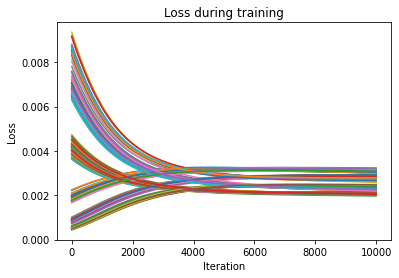

In [197]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
model = LogitRegression(learning_rate=0.001, iterations=10000)
model.fit(X_train, Y_train)

plt.plot(model.losses)
#px.line(model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.show()

In [198]:
#Updated